# Giới thiệu

<b>Bạn đã bao giờ tự hỏi những yếu tố nào ảnh hưởng nhiều nhất đến nguy cơ mắc bệnh đái tháo đường? Hay đặc điểm nào giúp phân biệt giữa người có nguy cơ cao và người bình thường? Nếu bạn muốn khám phá, phân tích và tìm ra các mối quan hệ giữa các biến số y tế để hiểu rõ hơn về căn bệnh này thì bộ dữ liệu Pima Indian Diabetes có thể giúp bạn trả lời những câu hỏi đó!</b>

<b>Bộ dữ liệu này chứa thông tin y tế của phụ nữ người da đỏ Pima từ 21 tuổi trở lên, bao gồm các chỉ số như: số lần mang thai, nồng độ glucose, huyết áp, độ dày da, insulin, chỉ số BMI, chỉ số di truyền bệnh tiểu đường, cùng với tuổi. Dữ liệu cũng có nhãn cho biết mỗi cá nhân có được chẩn đoán mắc bệnh đái tháo đường hay không.</b>

<b>Hãy khám phá và phân tích dữ liệu để phát hiện những yếu tố quan trọng góp phần dự đoán và phòng ngừa bệnh đái tháo đường.</b>

Khám phá dữ liệu ban đầu (Initial EDA)

Cách thực hiện: Sử dụng các thư viện Python mạnh mẽ [pandas, matplotlib và seaborn].

In [60]:
# Import cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thống kê và kiểm định
from scipy import stats

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, classification_report
)

# Giảm chiều & phân cụm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Statsmodels cho phân tích nâng cao
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cảnh báo
import warnings
warnings.filterwarnings("ignore")


# Tải dataset

In [3]:
# Định nghĩa tên các cột theo tài liệu UCI
columns = [
    "Pregnancies",            # Số lần mang thai
    "Glucose",                # Nồng độ glucose huyết tương
    "BloodPressure",          # Huyết áp tâm trương
    "SkinThickness",          # Độ dày nếp gấp da (mm)
    "Insulin",                # Insulin huyết thanh (mu U/ml)
    "BMI",                    # Chỉ số khối cơ thể
    "DiabetesPedigreeFunction", # Hàm phả hệ tiểu đường (yếu tố di truyền)
    "Age",                    # Tuổi
    "Outcome"                 # Kết quả (0: Không mắc, 1: Mắc tiểu đường)
]
# Đọc dataset Pima Indians Diabetes
df = pd.read_csv("pima-indians-diabetes.csv", header=None, names=columns)

# Khám phá dữ liệu ban đầu

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.shape

(768, 9)

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Các biến trong tập dữ liệu

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Kiểm tra các giá trị null/NA

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Thống kê mô tả của các biến trong tập dữ liệu

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Kiểm tra sự cân bằng giữa các lớp trong tập dữ liệu

In [10]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Mối tương quan giữa các biến số

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Tiền xử lý dữ liệu

Làm sạch dữ liệu là một bước quan trọng trước khi thực hiện **EDA**,  
vì nó sẽ loại bỏ những dữ liệu không rõ ràng có thể ảnh hưởng đến kết quả phân tích.

**Các bước thực hiện**:
- 🗑️ Loại bỏ các hàng trùng lặp  
- 🔧 Xử lý các giá trị bị lỗi  
- 🔧 Xử lý các giá trị 0 bất thường

## Loại bỏ các hàng trùng lặp

In [4]:
# Kiểm tra dòng trùng lặp
duplicates = df.duplicated()
print("Số dòng trùng lặp:", duplicates.sum())

# Xóa dòng trùng lặp
df_cleaned = df.drop_duplicates()
print("Kích thước sau khi xóa trùng lặp:", df_cleaned.shape)

Số dòng trùng lặp: 0
Kích thước sau khi xóa trùng lặp: (768, 9)


## Xử lý các giá trị bị lỗi

Xác định ngưỡng sinh lý

In [5]:
# NGƯỠNG RỘNG ĐỂ BẢO TOÀN DỮ LIỆU - CHỈ LỌC GIÁ TRỊ VÔ LÝ THỰC SỰ
physiological_ranges = {
    'Pregnancies': (0, 20),           # Số lần mang thai hợp lý
    'Glucose': (20, 300),             # Cho phép cả giá trị bệnh lý cao
    'BloodPressure': (40, 200),       # Bao gồm cả tăng huyết áp nặng
    'BMI': (10, 80),                  # Bao gồm cả béo phì bệnh lý
    'Age': (21, 100)                  # Tuổi hợp lý cho nghiên cứu
     # Với các chỉ số khác, có thể chỉ xử lý giá trị 0
}

Phát hiện dữ liệu lỗi

In [6]:
def detect_physiological_errors(df, ranges):
    """Phát hiện dữ liệu ngoài ngưỡng sinh lý"""
    errors = {}
    
    for column, (min_val, max_val) in ranges.items():
        # Tìm các giá trị ngoài ngưỡng
        out_of_range = (df[column] < min_val) | (df[column] > max_val)
        error_count = out_of_range.sum()
        
        if error_count > 0:
            errors[column] = {
                'count': error_count,
                'min_actual': df[column].min(),
                'max_actual': df[column].max(),
                'problem_values': df[column][out_of_range].unique()
            }
    
    return errors

# Phát hiện lỗi
errors = detect_physiological_errors(df, physiological_ranges)
print("=== DỮ LIỆU LỖI PHÁT HIỆN ===")
for col, info in errors.items():
    print(f"{col}: {info['count']} giá trị lỗi")
    print(f"  - Range thực tế: {info['min_actual']} - {info['max_actual']}")
    print(f"  - Giá trị có vấn đề: {info['problem_values']}")

=== DỮ LIỆU LỖI PHÁT HIỆN ===
Glucose: 5 giá trị lỗi
  - Range thực tế: 0 - 199
  - Giá trị có vấn đề: [0]
BloodPressure: 39 giá trị lỗi
  - Range thực tế: 0 - 122
  - Giá trị có vấn đề: [ 0 30 24 38]
BMI: 11 giá trị lỗi
  - Range thực tế: 0.0 - 67.1
  - Giá trị có vấn đề: [0.]


Xử lý dữ liệu lỗi

In [7]:
# Chiến lược: XÓA các dòng có dữ liệu lỗi nghiêm trọng
def clean_physiological_errors(df, ranges):
    """Xóa dòng có dữ liệu ngoài ngưỡng sinh lý"""
    
    # Tạo mask để đánh dấu dòng lỗi
    error_mask = pd.Series(False, index=df.index)
    
    # Các chỉ số QUAN TRỌNG cần xử lý nghiêm ngặt
    critical_columns = ['Glucose', 'BloodPressure', 'BMI', 'Age']
    
    for column in critical_columns:
        min_val, max_val = ranges[column]
        # Đánh dấu dòng có giá trị ngoài ngưỡng
        error_mask |= (df[column] < min_val) | (df[column] > max_val)
    
    print(f"Số dòng có dữ liệu lỗi nghiêm trọng: {error_mask.sum()}")
    
    # Giữ lại các dòng KHÔNG có lỗi
    df_clean = df[~error_mask].copy()
    
    return df_clean

# Xử lý dữ liệu lỗi
df_clean = clean_physiological_errors(df, physiological_ranges)

Số dòng có dữ liệu lỗi nghiêm trọng: 48


## Xử lý giá trị 0 bất thường

In [8]:
# Sau khi xử lý lỗi nghiêm trọng, xử lý giá trị 0
def handle_zero_values(df):
    """Xử lý giá trị 0 bất thường trong các chỉ số sinh học"""
    
    # Các cột không được phép có giá trị 0
    zero_sensitive_columns = ['Insulin', 'SkinThickness']
    
    for col in zero_sensitive_columns:
        zero_mask = df[col] == 0
        if zero_mask.any():
            print(f"Phát hiện {zero_mask.sum()} giá trị 0 trong {col}")
            
            # Thay thế bằng median của cột (không bao gồm giá trị 0)
            median_val = df[col][df[col] > 0].median()
            df.loc[zero_mask, col] = median_val
            print(f"  → Đã thay thế bằng median: {median_val:.2f}")
    
    return df

# Xử lý giá trị 0
df_final = handle_zero_values(df_clean)

Phát hiện 332 giá trị 0 trong Insulin
  → Đã thay thế bằng median: 126.00
Phát hiện 192 giá trị 0 trong SkinThickness
  → Đã thay thế bằng median: 29.00


<b>Kết quả thu được</b>

In [9]:
print("=== KẾT QUẢ SAU XỬ LÝ ===")
print(f"Dữ liệu gốc: {len(df)} dòng")
print(f"Sau xử lý: {len(df_final)} dòng")
print(f"Tỷ lệ giữ lại: {len(df_final)/len(df)*100:.1f}%")

# Kiểm tra lại ngưỡng sinh lý
final_errors = detect_physiological_errors(df_final, physiological_ranges)
if not final_errors:
    print("✅ Tất cả dữ liệu đều trong ngưỡng sinh lý hợp lý")
else:
    print("❌ Vẫn còn dữ liệu lỗi:")
    for col, info in final_errors.items():
        print(f"  - {col}: {info['count']} lỗi")

=== KẾT QUẢ SAU XỬ LÝ ===
Dữ liệu gốc: 768 dòng
Sau xử lý: 720 dòng
Tỷ lệ giữ lại: 93.8%
✅ Tất cả dữ liệu đều trong ngưỡng sinh lý hợp lý


In [10]:
# Thống kê mô tả cơ bản
stats = df_final.describe().T  # chuyển thành bảng với biến số theo hàng

# Thêm cột Median
stats["median"] = df_final.median()

# Chọn cột cần hiển thị
stats = stats[["mean", "std", "min", "max", "median"]]

# Làm tròn cho đẹp
stats = stats.round(2)

print(stats)

# Số lượng bản ghi còn lại sau xử lý
print("\nKích thước dataset sau xử lý:", df_final.shape)


                            mean    std    min     max  median
Pregnancies                 3.88   3.37   0.00   17.00    3.00
Glucose                   122.02  30.77  44.00  199.00  117.00
BloodPressure              72.63  12.01  40.00  122.00   72.00
SkinThickness              29.13   9.01   7.00   99.00   29.00
Insulin                   142.61  88.76  14.00  846.00  126.00
BMI                        32.44   6.83  18.20   67.10   32.40
DiabetesPedigreeFunction    0.48   0.33   0.08    2.42    0.38
Age                        33.39  11.78  21.00   81.00   29.00
Outcome                     0.34   0.48   0.00    1.00    0.00

Kích thước dataset sau xử lý: (720, 9)


# EDA

## Phân tích đơn biến

<b> 👉 Các biến (Pregnancies, Glucose, BMI, Blood Pressure…) có phân bố như thế nào? Có tuân theo phân phối chuẩn không?<b/>

Phân tích đơn biến tập trung vào việc khám phá đặc điểm phân phối và tính chất của từng biến số một cách riêng lẻ, không xem xét mối quan hệ với các biến khác.

### Phân tích từng biến số

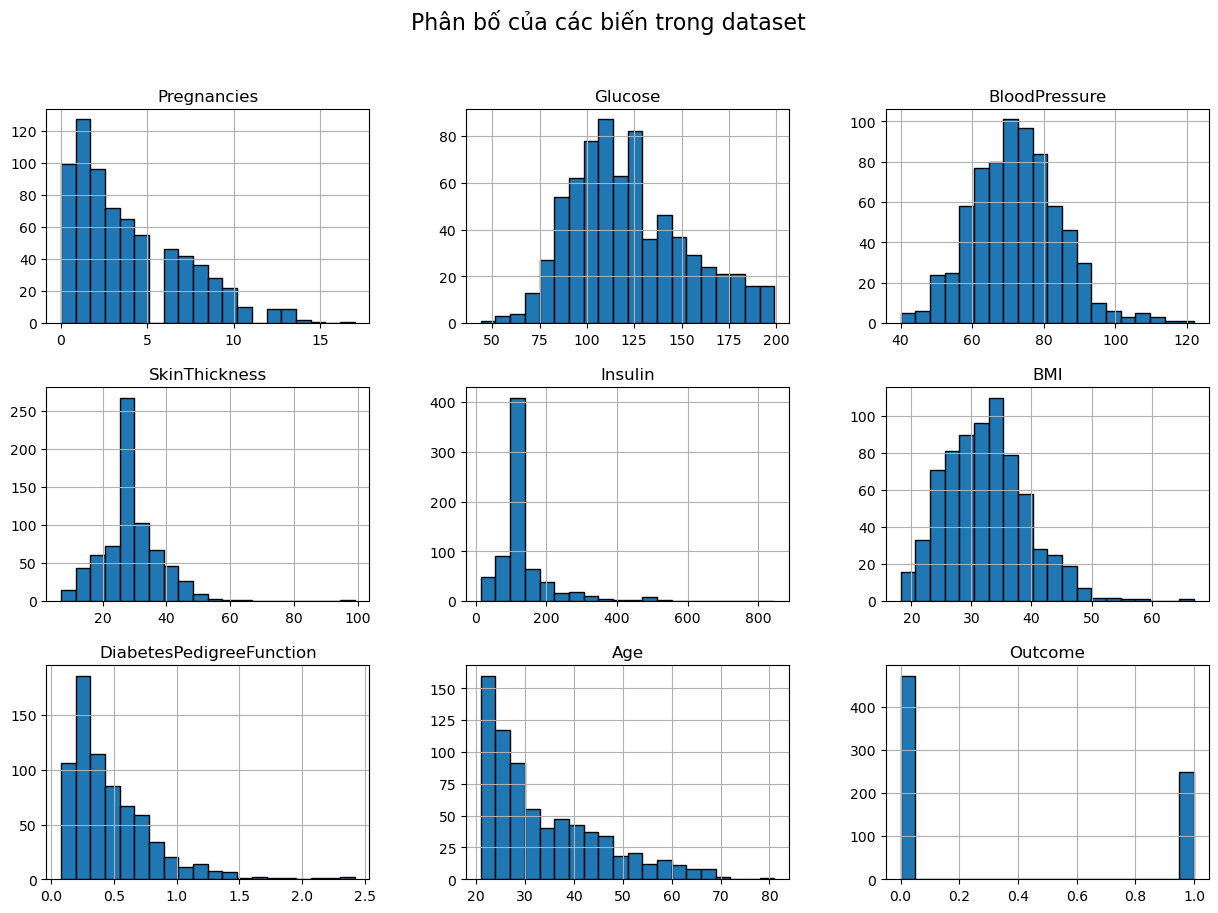

In [24]:
df_final.hist(bins=20, figsize=(15,10), edgecolor="black")
plt.suptitle("Phân bố của các biến trong dataset", fontsize=16)
#plt.savefig('4.1.1.png', dpi=300, bbox_inches='tight')
plt.show()

Dữ liệu y tế có tính không đồng đều (heterogeneity), phản ánh sự khác biệt sinh lý giữa bệnh nhân

### Phát hiện các giá trị ngoại lệ và bất thường

<b> Có tồn tại các giá trị ngoại lệ (outliers) không? </b>

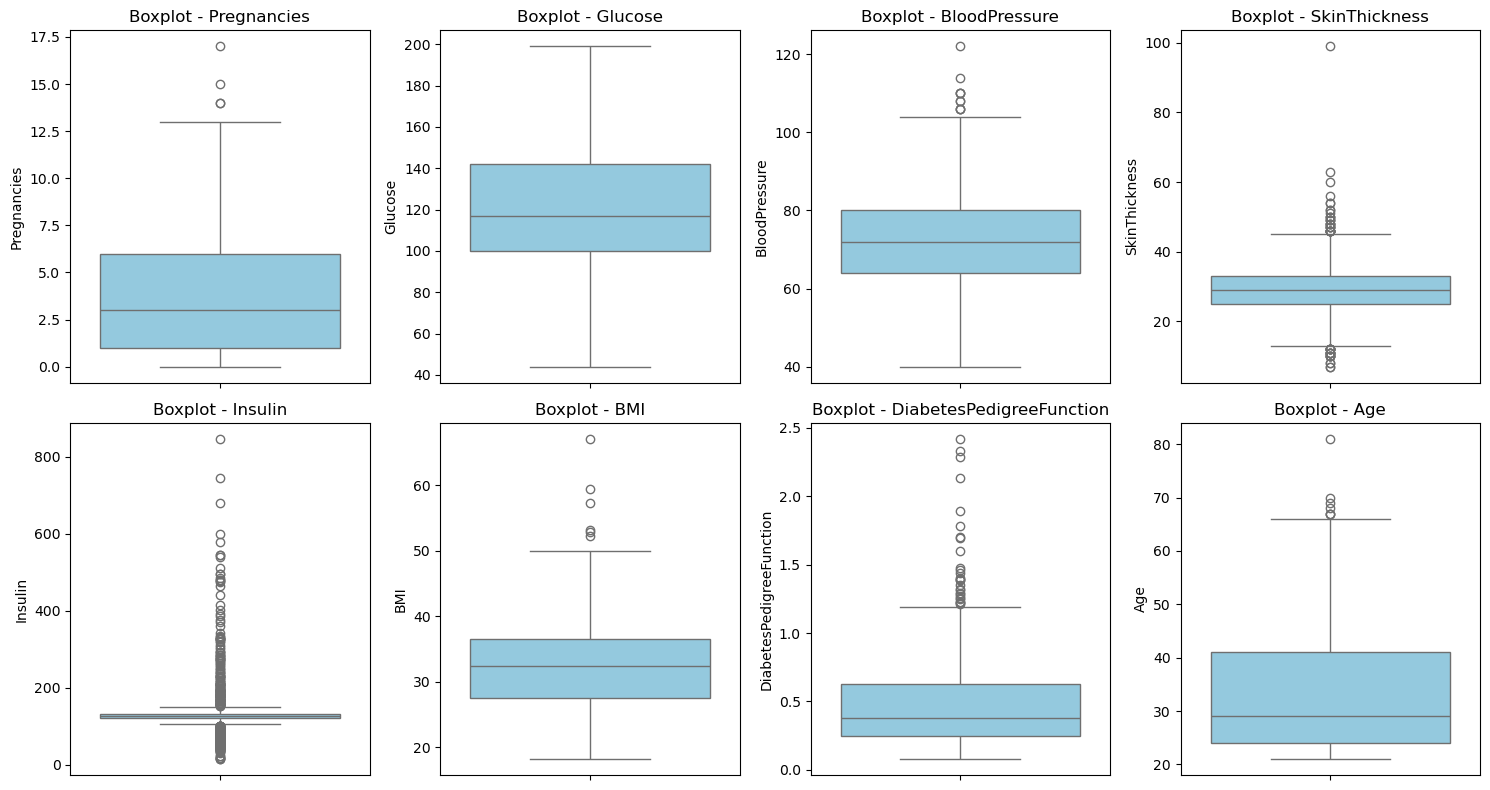

In [14]:
plt.figure(figsize=(15,8))   # Kích thước toàn bộ figure

# Lặp qua các cột, bỏ cột cuối (Outcome)
for i, col in enumerate(df_final.columns[:-1], 1):
    plt.subplot(2,4,i)   # Chia thành lưới 2 hàng 4 cột, vẽ lần lượt
    sns.boxplot(y=df_final[col], color="skyblue")  # Boxplot theo cột
    plt.title(f"Boxplot - {col}")  # Đặt tiêu đề cho mỗi subplot

plt.tight_layout()   # Canh chỉnh bố cục gọn gàng
#plt.savefig('4.1.2.png')  # Lưu hình
plt.show()  # Hiển thị

Mặc dù đã xử lý dữ liệu, nhưng một số biến vẫn tồn tại ngoại lệ (outliers). Đây có thể là những bệnh nhân có tình trạng sinh lý đặc biệt hoặc dữ liệu bị nhiễu. Tuy nhiên, thay vì loại bỏ, nghiên cứu này giữ nguyên để đảm bảo số lượng dữ liệu.

## Phân tích biến mục tiêu

### Tỷ lệ mắc bệnh đái tháo đường trong dataset

<b> Tỷ lệ bệnh nhân mắc tiểu đường so với người khỏe mạnh là bao nhiêu? </b>

C:\Users\boeot\AppData\Local\Temp\ipykernel_18900\15267789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Outcome", data=df_final, palette="Set2")


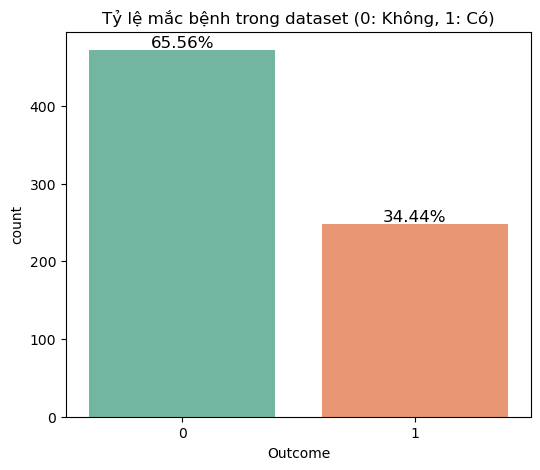

In [15]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x="Outcome", data=df_final, palette="Set2")
plt.title("Tỷ lệ mắc bệnh trong dataset (0: Không, 1: Có)")

# Thêm nhãn phần trăm trên từng cột
total = len(df_final)
for p in ax.patches:
    count = p.get_height()
    percentage = 100 * count / total
    ax.annotate(f'{percentage:.2f}%', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', fontsize=12)

#plt.savefig('4.2.1.png', dpi=300, bbox_inches='tight')
plt.show()


Tỷ lệ mắc bệnh 34.44% là rất cao so với dân số chung (thường 8-10%)
Điều này phản ánh đặc thù của người Pima Indians, được biết đến với tỷ lệ đái tháo đường cao nhất thế giới.


### Đặc điểm nhóm bệnh nhân và nhóm khỏe mạnh

<b> Các chỉ số trung bình (glucose, BMI, huyết áp, insulin) khác biệt thế nào giữa nhóm mắc và nhóm không mắc bệnh? </b>

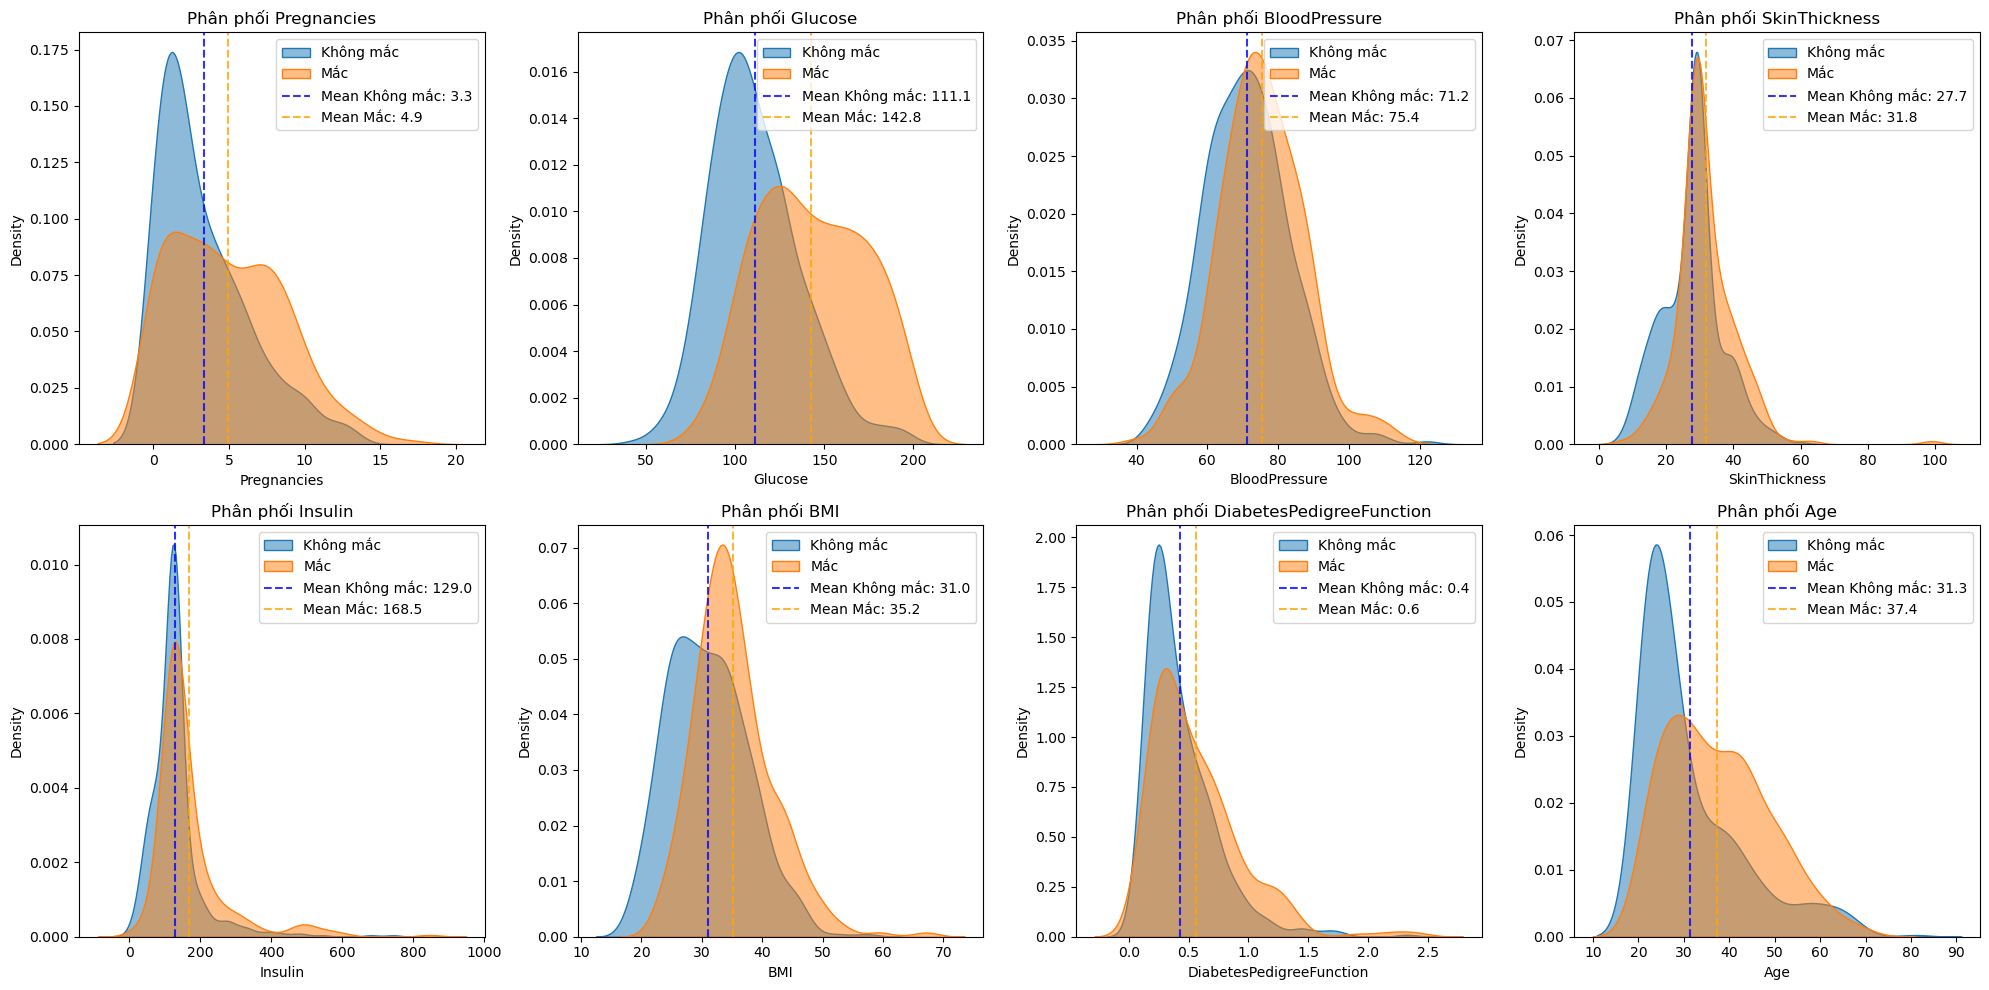

In [18]:
# Danh sách tất cả các biến cần vẽ
all_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
               'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Tạo figure lớn để chứa tất cả biểu đồ
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()  # Chuyển thành mảng 1 chiều

for i, column in enumerate(all_columns):
    # Vẽ density plot cho 2 nhóm
    sns.kdeplot(data=df_final[df_final['Outcome'] == 0][column], 
                label='Không mắc', fill=True, alpha=0.5, ax=axes[i])
    sns.kdeplot(data=df_final[df_final['Outcome'] == 1][column], 
                label='Mắc', fill=True, alpha=0.5, ax=axes[i])
    
    # Thêm đường mean cho từng nhóm
    mean_0 = df_final[df_final['Outcome'] == 0][column].mean()
    mean_1 = df_final[df_final['Outcome'] == 1][column].mean()
    
    axes[i].axvline(mean_0, color='blue', linestyle='--', alpha=0.8, label=f'Mean Không mắc: {mean_0:.1f}')
    axes[i].axvline(mean_1, color='orange', linestyle='--', alpha=0.8, label=f'Mean Mắc: {mean_1:.1f}')
    
    axes[i].set_title(f'Phân phối {column}')
    axes[i].set_xlabel(column)
    axes[i].legend()

plt.tight_layout()
#plt.savefig('4.2.2.png', dpi=300, bbox_inches='tight')
plt.show()

Sự khác biệt rõ rệt giữa hai nhóm khẳng định giá trị dự báo của các biến số trong dataset. Các chỉ số Glucose, tuổi và BMI có tiềm năng lớn trong việc sàng lọc và chẩn đoán sớm đái tháo đường.

## Phân bố theo nhóm tuổi

### Phân bố bệnh theo độ tuổi

<b> Nguy cơ mắc bệnh thay đổi thế nào theo độ tuổi? </b>

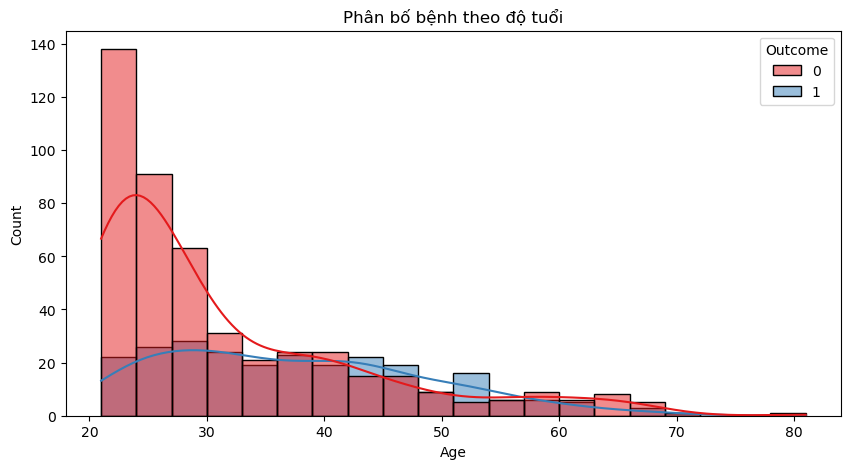

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_final, x="Age", hue="Outcome", bins=20, kde=True, palette="Set1")
plt.title("Phân bố bệnh theo độ tuổi")
#plt.savefig('4.3.1.png', dpi=300, bbox_inches='tight')
plt.show()

Tuổi tác là yếu tố nguy cơ quan trọng, với xu hướng tăng rõ rệt theo từng nhóm, phân tầng theo độ tuổi.


In [33]:
# Tạo nhóm tuổi thủ công theo số liệu của bạn
def create_age_group(age):
    if age <= 30:
        return '21-30 tuổi'
    elif age <= 40:
        return '31-40 tuổi' 
    elif age <= 50:
        return '41-50 tuổi'
    else:
        return '>50 tuổi'

df_final['Age_Group_Custom'] = df_final['Age'].apply(create_age_group)

# Kiểm tra
print("=== NHÓM TUỔI TÙY CHỈNH ===")
custom_counts = df_final['Age_Group_Custom'].value_counts().sort_index()
print(custom_counts)

# Tính tỷ lệ
custom_analysis = df_final.groupby('Age_Group_Custom').agg(
    total=('Outcome', 'count'),
    diabetes_cases=('Outcome', 'sum')
)
custom_analysis['diabetes_rate'] = (custom_analysis['diabetes_cases'] / custom_analysis['total'] * 100).round(1)

print("\n=== KẾT QUÁ TÙY CHỈNH ===")
for age_group in ['21-30 tuổi', '31-40 tuổi', '41-50 tuổi', '>50 tuổi']:
    if age_group in custom_analysis.index:
        data = custom_analysis.loc[age_group]
        print(f"{age_group}: {data['diabetes_rate']}% tỷ lệ mắc bệnh (n={data['total']})")

=== NHÓM TUỔI TÙY CHỈNH ===
Age_Group_Custom
21-30 tuổi    387
31-40 tuổi    147
41-50 tuổi    108
>50 tuổi       78
Name: count, dtype: int64

=== KẾT QUÁ TÙY CHỈNH ===
21-30 tuổi: 20.7% tỷ lệ mắc bệnh (n=387.0)
31-40 tuổi: 47.6% tỷ lệ mắc bệnh (n=147.0)
41-50 tuổi: 56.5% tỷ lệ mắc bệnh (n=108.0)
>50 tuổi: 47.4% tỷ lệ mắc bệnh (n=78.0)


•	Có xu hướng tăng tuyến tính theo tuổi

•	Ngay cả nhóm trẻ nhất cũng có tỷ lệ mắc bệnh cao (20.7%)

•	Điều này phản ánh đặc thù di truyền của người Pima Indians


### Các chỉ số sinh lý thay đổi theo tuổi

<b> BMI, glucose, huyết áp thay đổi ra sao ở các nhóm tuổi? </b>

In [34]:
# Tạo nhóm tuổi chi tiết hơn để phân tích
bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 100]
labels = ['20-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '>60']
df_final['Age_Group_Detail'] = pd.cut(df_final['Age'], bins=bins, labels=labels, right=False)

# Tính giá trị trung bình theo nhóm tuổi
age_trends = df_final.groupby('Age_Group_Detail').agg({
    'BMI': 'mean',
    'Glucose': 'mean', 
    'BloodPressure': 'mean',
    'Age': 'count'
}).round(2)

age_trends = age_trends.rename(columns={'Age': 'Sample_Count'})

print("=== THỐNG KÊ CHỈ SỐ THEO NHÓM TUỔI ===")
print(age_trends)

=== THỐNG KÊ CHỈ SỐ THEO NHÓM TUỔI ===
                    BMI  Glucose  BloodPressure  Sample_Count
Age_Group_Detail                                             
20-25             31.00   113.04          67.75           204
26-30             33.49   117.63          70.95           164
31-35             32.27   124.71          72.35            85
36-40             33.09   128.16          75.87            69
41-45             34.52   125.71          75.79            68
46-50             33.88   124.32          79.61            44
51-55             33.14   142.88          82.03            34
56-60             29.98   136.95          75.64            22
>60               29.70   138.97          78.13            30


C:\Users\boeot\AppData\Local\Temp\ipykernel_18900\1521796606.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trends = df_final.groupby('Age_Group_Detail').agg({


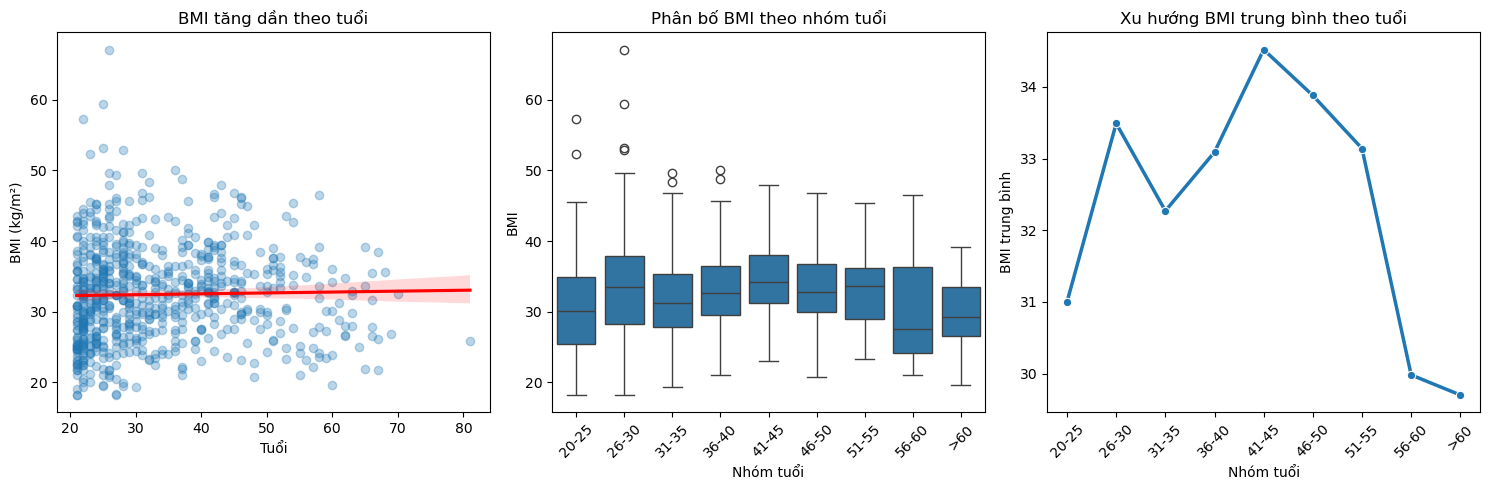

In [24]:
# Biểu đồ 1: BMI thay đổi theo tuổi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.regplot(data=df_final, x='Age', y='BMI', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('BMI tăng dần theo tuổi')
plt.xlabel('Tuổi')
plt.ylabel('BMI (kg/m²)')

# Thêm boxplot theo nhóm tuổi
plt.subplot(1, 3, 2)
sns.boxplot(data=df_final, x='Age_Group_Detail', y='BMI')
plt.title('Phân bố BMI theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('BMI')
plt.xticks(rotation=45)

# Đường trend BMI theo tuổi
plt.subplot(1, 3, 3)
sns.lineplot(data=age_trends, x=age_trends.index, y='BMI', marker='o', linewidth=2.5)
plt.title('Xu hướng BMI trung bình theo tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('BMI trung bình')
plt.xticks(rotation=45)

plt.tight_layout()
#plt.savefig('4.3.2_BMI_theo_tuoi.png', dpi=300, bbox_inches='tight')
plt.show()

•	Nhóm 41-45 tuổi có BMI trung bình cao nhất

•	Phản ánh xu hướng tăng cân theo tuổi


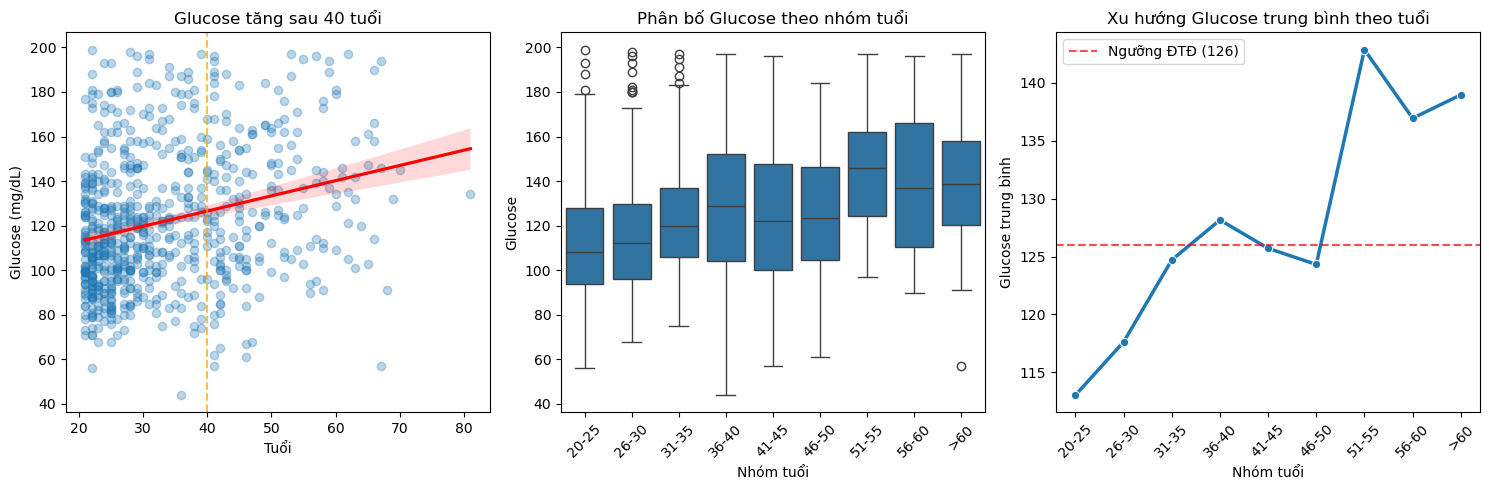

In [26]:
# Biểu đồ 2: Glucose thay đổi theo tuổi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.regplot(data=df_final, x='Age', y='Glucose', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Glucose tăng sau 40 tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Glucose (mg/dL)')
plt.axvline(x=40, color='orange', linestyle='--', alpha=0.7, label='Tuổi 40')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_final, x='Age_Group_Detail', y='Glucose')
plt.title('Phân bố Glucose theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Glucose')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.lineplot(data=age_trends, x=age_trends.index, y='Glucose', marker='o', linewidth=2.5)
plt.axhline(y=126, color='red', linestyle='--', alpha=0.7, label='Ngưỡng ĐTĐ (126)')
plt.title('Xu hướng Glucose trung bình theo tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Glucose trung bình')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
#plt.savefig('4.3.2_Glucose_theo_tuoi.png', dpi=300, bbox_inches='tight')
plt.show()

Glucose có xu hướng tăng rõ rệt sau 40 tuổi. Đây là ngưỡng cần tầm soát đái tháo đường tích cực.

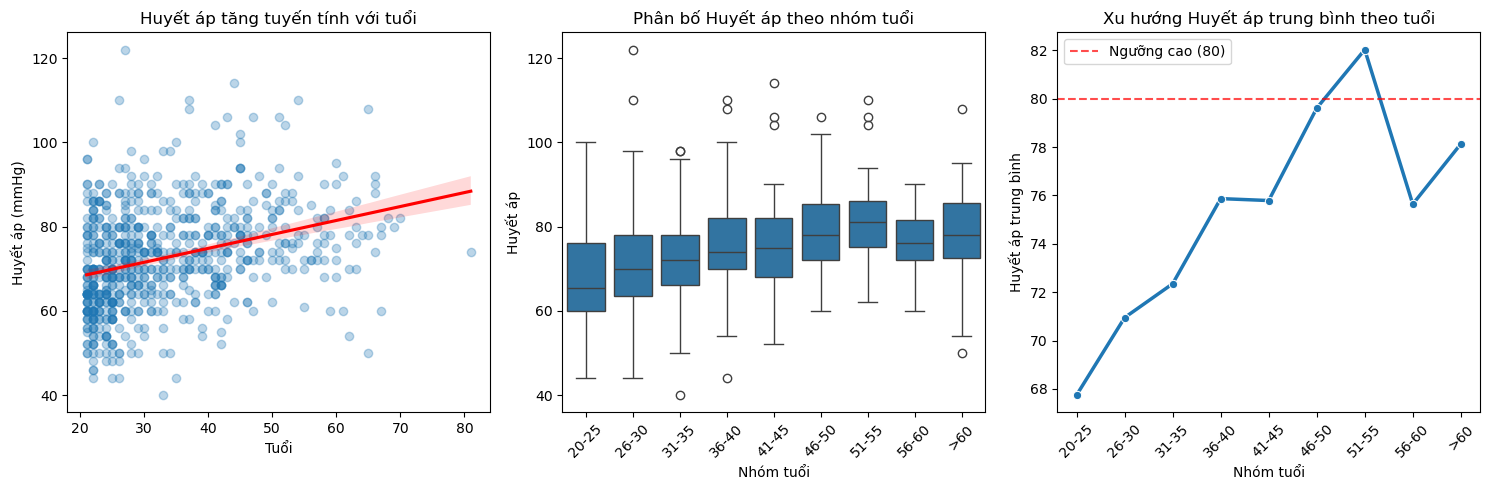

In [27]:
# Biểu đồ 3: Huyết áp thay đổi theo tuổi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.regplot(data=df_final, x='Age', y='BloodPressure', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Huyết áp tăng tuyến tính với tuổi')
plt.xlabel('Tuổi')
plt.ylabel('Huyết áp (mmHg)')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_final, x='Age_Group_Detail', y='BloodPressure')
plt.title('Phân bố Huyết áp theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Huyết áp')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.lineplot(data=age_trends, x=age_trends.index, y='BloodPressure', marker='o', linewidth=2.5)
plt.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='Ngưỡng cao (80)')
plt.title('Xu hướng Huyết áp trung bình theo tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Huyết áp trung bình')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
#plt.savefig('4.3.2_Huyet_ap_theo_tuoi.png', dpi=300, bbox_inches='tight')
plt.show()

Huyết áp và tuổi:

•	Huyết áp tăng tuyến tính với tuổi

•	Phản ánh những thay đổi tự nhiên của hệ tim mạch

### Yếu tố nguy cơ ở từng nhóm tuổi

<b> Nhóm tuổi nào có nguy cơ cao nhất? Yếu tố nào nổi bật trong nhóm đó? </b>

Các cột trong DataFrame:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Age_Group_Custom', 'Age_Group_Detail', 'AgeGroup']

Tỷ lệ mắc bệnh theo nhóm tuổi:
AgeGroup
20-29    0.206718
30-39    0.476190
40-49    0.564815
50-59    0.566038
≥60      0.280000
Name: Outcome, dtype: float64


C:\Users\boeot\AppData\Local\Temp\ipykernel_18900\764074169.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_outcome = df_final.groupby("AgeGroup")["Outcome"].mean()


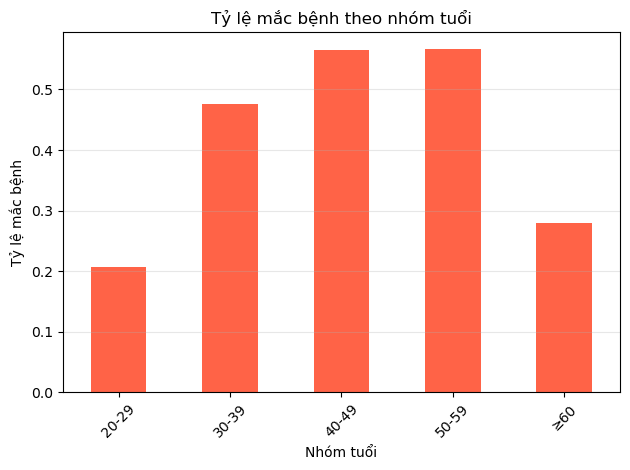

In [36]:
# 1. TẠO CỘT AgeGroup TRƯỚC
bins = [20, 30, 40, 50, 60, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '≥60']
df_final['AgeGroup'] = pd.cut(df_final['Age'], bins=bins, labels=labels)

# 2. KIỂM TRA CỘT ĐÃ TẠO
print("Các cột trong DataFrame:")
print(df_final.columns.tolist())

# 3. CHẠY LẠI CODE GROUPBY
age_outcome = df_final.groupby("AgeGroup")["Outcome"].mean()
print("\nTỷ lệ mắc bệnh theo nhóm tuổi:")
print(age_outcome)

# 4. VẼ BIỂU ĐỒ
age_outcome.plot(kind="bar", color="tomato", title="Tỷ lệ mắc bệnh theo nhóm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Tỷ lệ mắc bệnh")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Nhóm trẻ (<30 tuổi):

•	Yếu tố chính: BMI và insulin resistance

•	Đặc điểm: Béo phì sớm, kháng insulin do lối sống

•	Can thiệp: Tập trung vào kiểm soát cân nặng và lối sống

Nhóm trung niên (30-50 tuổi):

•	Yếu tố chính: Tích lũy đa yếu tố nguy cơ

•	Đặc điểm: Kết hợp nhiều yếu tố như tuổi tác, sinh sản, béo phì

•	Can thiệp: Cần phương pháp tích hợp

Nhóm cao tuổi (>50 tuổi):

•	Yếu tố chính: Glucose và huyết áp quan trọng nhất

•	Đặc điểm: Suy giảm chức năng nội tiết, biến chứng tim mạch

•	Can thiệp: Tập trung điều trị y tế


## Phân tích theo chỉ số BMI

### Phân loại BMI và tỷ lệ mắc bệnh

<b>Người thừa cân/béo phì có tỷ lệ mắc bệnh cao hơn nhóm bình thường không? </b>

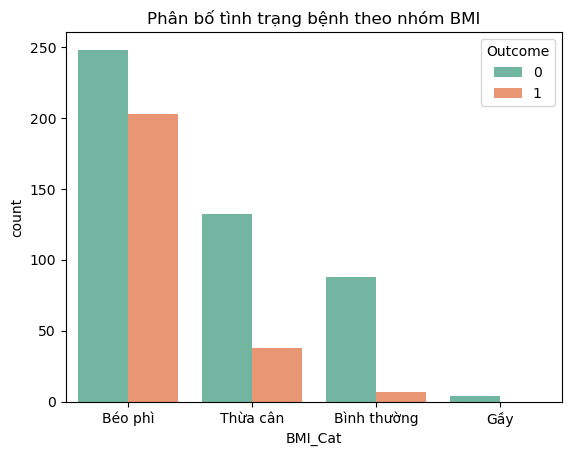

In [38]:
def bmi_category(bmi):
    if bmi < 18.5: return "Gầy"
    elif bmi < 25: return "Bình thường"
    elif bmi < 30: return "Thừa cân"
    else: return "Béo phì"

df_final["BMI_Cat"] = df_final["BMI"].apply(bmi_category)

sns.countplot(x="BMI_Cat", hue="Outcome", data=df_final, palette="Set2")
plt.title("Phân bố tình trạng bệnh theo nhóm BMI")
#plt.savefig('4.4.1.png', dpi=300, bbox_inches='tight')
plt.show()

In [45]:
# Tính toán tỷ lệ mắc bệnh theo nhóm BMI
bmi_analysis = df_final.groupby('BMI_Cat').agg({
    'Outcome': ['count', 'sum', 'mean']
}).round(3)

bmi_analysis.columns = ['Số lượng', 'Số ca bệnh', 'Tỷ lệ mắc bệnh']
bmi_analysis['Tỷ lệ %'] = (bmi_analysis['Tỷ lệ mắc bệnh'] * 100).round(1)

print("📊 TỶ LỆ THEO NHÓM BMI:")
print(bmi_analysis)

📊 PHÂN TÍCH THEO NHÓM BMI:
             Số lượng  Số ca bệnh  Tỷ lệ mắc bệnh  Tỷ lệ %
BMI_Cat                                                   
Béo phì           451         203           0.450     45.0
Bình thường        95           7           0.074      7.4
Gầy                 4           0           0.000      0.0
Thừa cân          170          38           0.224     22.4


### Mối quan hệ giữa béo phì và đái tháo đường

<b> Có mối tương quan trực tiếp nào giữa BMI và khả năng mắc bệnh không? </b>

In [59]:
# 4.4.2 MỐI QUAN HỆ GIỮA BÉO PHÌ VÀ ĐÁI THÁO ĐƯỜNG
print("=== PHÂN TÍCH MỐI QUAN HỆ BMI VÀ ĐÁI THÁO ĐƯỜNG ===")

# Kiểm định sự khác biệt BMI giữa 2 nhóm
bmi_healthy = df_final[df_final['Outcome'] == 0]['BMI']
bmi_diabetes = df_final[df_final['Outcome'] == 1]['BMI']

t_stat, p_value = stats.ttest_ind(bmi_diabetes, bmi_healthy)
print(f"Kiểm định t: t = {t_stat:.3f}, p-value = {p_value:.4f}")

# Tính OR (Odds Ratio) cho béo phì
obese_mask = df_final['BMI'] >= 30
obese_diabetes = df_final[obese_mask]['Outcome'].mean()
non_obese_diabetes = df_final[~obese_mask]['Outcome'].mean()

odds_ratio = (obese_diabetes / (1 - obese_diabetes)) / (non_obese_diabetes / (1 - non_obese_diabetes))
print(f"Odds Ratio (Béo phì vs Không béo phì): {odds_ratio:.2f}")

# Tính correlation
correlation = df_final['BMI'].corr(df_final['Outcome'])
print(f"Hệ số tương quan BMI - Outcome: {correlation:.3f}")

print(f"   → Người béo phì có nguy cơ mắc bệnh cao gấp {odds_ratio:.1f} lần")

=== PHÂN TÍCH MỐI QUAN HỆ BMI VÀ ĐÁI THÁO ĐƯỜNG ===
Kiểm định t: t = 8.321, p-value = 0.0000
Odds Ratio (Béo phì vs Không béo phì): 4.07
Hệ số tương quan BMI - Outcome: 0.297
   → Người béo phì có nguy cơ mắc bệnh cao gấp 4.1 lần


In [55]:
# 5.3 Mô hình hồi quy logistic
print(f"\n🤖 MÔ HÌNH HỒI QUY LOGISTIC:")

# Chuẩn bị dữ liệu cho mô hình
X = df_final[['BMI', 'Age', 'Glucose']]  # Chọn các features quan trọng
y = df_final['Outcome']

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Đánh giá mô hình
y_pred = log_model.predict(X_test)
accuracy = log_model.score(X_test, y_test)

print(f"   - Độ chính xác mô hình: {accuracy:.3f}")
print(f"   - Hệ số hồi quy cho BMI: {log_model.coef_[0][0]:.4f}")

# Tính OR từ hệ số hồi quy
bmi_coef = log_model.coef_[0][0]
bmi_odds_ratio = np.exp(bmi_coef)
print(f"   - Odds Ratio cho BMI (mỗi đơn vị tăng): {bmi_odds_ratio:.4f}")
print(f"   → Cứ mỗi đơn vị BMI tăng, nguy cơ mắc bệnh tăng {((bmi_odds_ratio-1)*100):.1f}%")


🤖 MÔ HÌNH HỒI QUY LOGISTIC:
   - Độ chính xác mô hình: 0.796
   - Hệ số hồi quy cho BMI: 0.0747
   - Odds Ratio cho BMI (mỗi đơn vị tăng): 1.0775
   → Cứ mỗi đơn vị BMI tăng, nguy cơ mắc bệnh tăng 7.8%


### BMI kết hợp với các yếu tố khác

<b> Nếu xét thêm glucose, insulin hoặc tuổi cùng với BMI thì nguy cơ thay đổi như thế nào? </b>

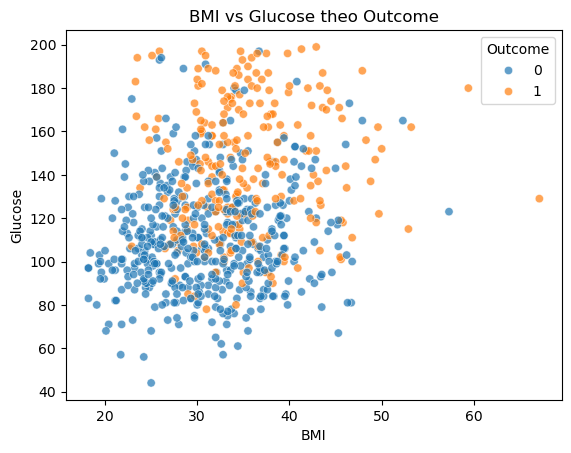

In [60]:
sns.scatterplot(x="BMI", y="Glucose", hue="Outcome", data=df_final, alpha=0.7)
plt.title("BMI vs Glucose theo Outcome")
#plt.savefig('4.4.3.png', dpi=300, bbox_inches='tight')
plt.show()

Có thể thấy xu hướng tổng thể, điểm mắc bệnh (màu cam) tập trung ở vùng BMI cao + Glucose cao. Còn điểm không mắc (màu xanh) tập trung ở vùng giá trị thấp. Khi BMI tăng, Glucose cũng có xu hướng tăng, mối quan hệ rõ rệt hơn ở các nhóm bệnh. 

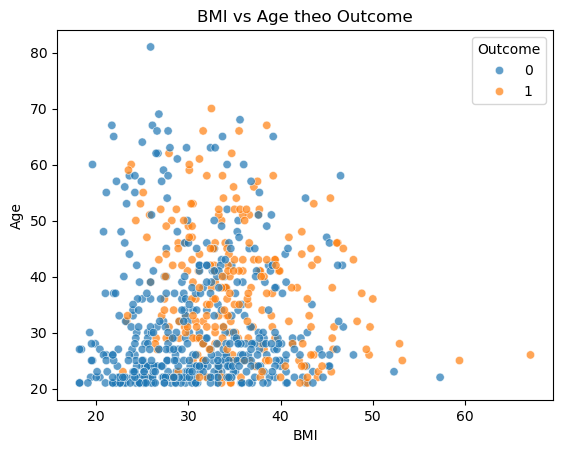

In [61]:
sns.scatterplot(x="BMI", y="Age", hue="Outcome", data=df_final, alpha=0.7)
plt.title("BMI vs Age theo Outcome")
#plt.savefig('4.4.3_age.png', dpi=300, bbox_inches='tight')
plt.show()

Biểu đồ cho thấy tuổi có tác động điều chỉnh mối quan hệ giữa BMI và đái tháo đường. Trong khi béo phì là yếu tố nguy cơ ở mọi lứa tuổi, nguy cơ này tăng dần theo tuổi và trở nên đặc biệt nghiêm trọng sau 50 tuổi.

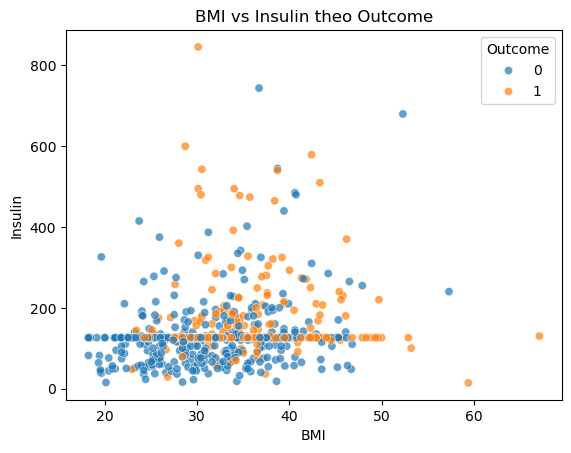

In [62]:
sns.scatterplot(x="BMI", y="Insulin", hue="Outcome", data=df_final, alpha=0.7)
plt.title("BMI vs Insulin theo Outcome")
#plt.savefig('4.4.3_insulin.png', dpi=300, bbox_inches='tight')
plt.show()

Nhóm mắc bệnh thể hiện tình trạng kháng insulin rõ rệt hơn, với xu hướng tập trung ở vùng BMI cao và nồng độ insulin cao.

## Phân tích Glucose và Insulin

### Phân bố nồng độ glucose

<b>Phân bố glucose trong dataset như thế nào? Nhóm mắc bệnh có xu hướng cao hơn không? </b>

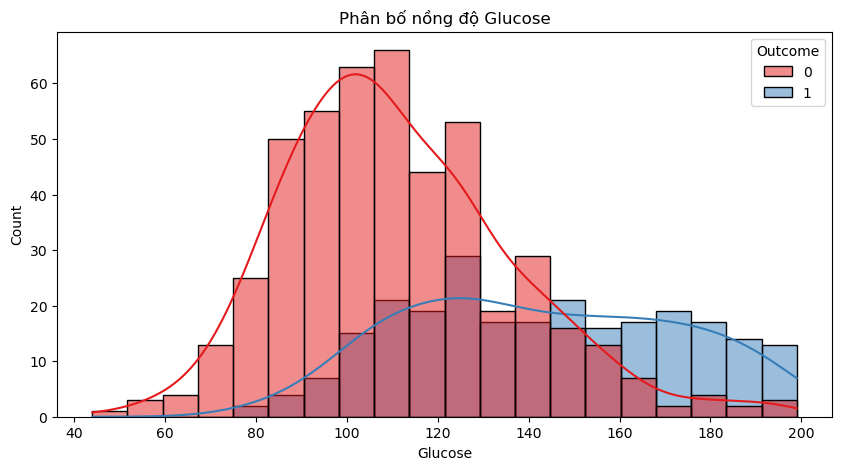

In [63]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_final, x="Glucose", hue="Outcome", bins=20, kde=True, palette="Set1")
plt.title("Phân bố nồng độ Glucose")
#plt.savefig('4.5.1.png', dpi=300, bbox_inches='tight')
plt.show()

Biểu đồ cho thấy glucose là chỉ số phân biệt mạnh nhất giữa hai nhóm, ít chồng lấp so với các biến số trước. Sự khác biệt rõ rệt về vị trí đỉnh phân phối (100-110 mg/dL vs 140-150 mg/dL) khẳng định vai trò then chốt của glucose trong chẩn đoán đái tháo đường.

In [64]:
# Code tính tỷ lệ theo ngưỡng chẩn đoán
normal = (df_final['Glucose'] < 100).sum()
prediabetes = ((df_final['Glucose'] >= 100) & (df_final['Glucose'] < 126)).sum()
diabetes = (df_final['Glucose'] >= 126).sum()
total = len(df_final)

print("=== PHÂN BỐ THEO TIÊU CHUẨN CHẨN ĐOÁN ===")
print(f"Bình thường (<100 mg/dL): {normal}/{total} ({normal/total*100:.1f}%)")
print(f"Tiền đái tháo đường (100-125 mg/dL): {prediabetes}/{total} ({prediabetes/total*100:.1f}%)")
print(f"Đái tháo đường (≥126 mg/dL): {diabetes}/{total} ({diabetes/total*100:.1f}%)")

# Tìm giá trị phổ biến nhất (mode)
glucose_mode = df_final['Glucose'].mode()[0]
print(f"Giá trị phổ biến nhất (mode): {glucose_mode} mg/dL")

=== PHÂN BỐ THEO TIÊU CHUẨN CHẨN ĐOÁN ===
Bình thường (<100 mg/dL): 179/720 (24.9%)
Tiền đái tháo đường (100-125 mg/dL): 258/720 (35.8%)
Đái tháo đường (≥126 mg/dL): 283/720 (39.3%)
Giá trị phổ biến nhất (mode): 100 mg/dL


In [65]:
# Nhóm đái tháo đường (>=126)
prediabetes_group = df_final[(df_final['Glucose'] >=126)]

# Đếm số người có Outcome = 1 trong nhóm này
prediabetes_with_outcome = (prediabetes_group['Outcome'] == 1).sum()

# Tính tỷ lệ %
percentage_prediabetes = prediabetes_with_outcome / len(prediabetes_group) * 100

print(f"Số người Glucose >=126 và Outcome = 1: {prediabetes_with_outcome}/{len(prediabetes_group)} ({percentage_prediabetes:.1f}%)")


Số người Glucose >=126 và Outcome = 1: 164/283 (58.0%)


### Mối quan hệ glucose-insulin

<b> Có mối quan hệ tuyến tính giữa glucose và insulin không? </b>

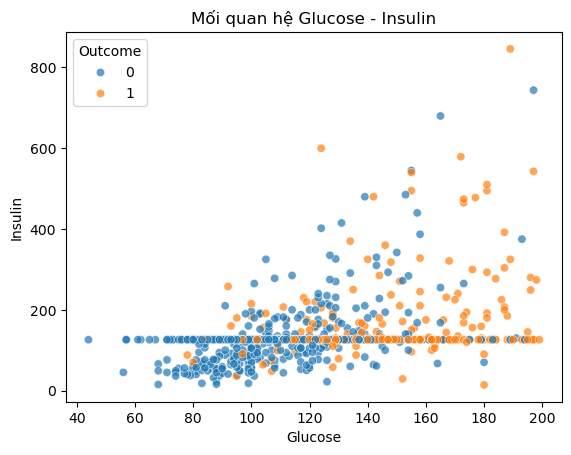

In [66]:
sns.scatterplot(x="Glucose", y="Insulin", hue="Outcome", data=df_final, alpha=0.7)
plt.title("Mối quan hệ Glucose - Insulin")
#plt.savefig('4.5.2.png', dpi=300, bbox_inches='tight')
plt.show()

Có thể thấy Glucoso tăng thì Insulin cũng có xu hướng tăng (đáp ứng Insulin bình thường). Tuy nhiên, mối quan hệ không tuyến tính mạnh. Biểu đồ cho thấy sự phức tạp của mối quan hệ Glucose-Insulin trong đái tháo đường. Không chỉ đơn thuần là glucose cao, mà cơ chế bệnh sinh có thể là kháng insulin hoặc thiếu insulin, hoặc kết hợp cả hai.

## Phân tích yếu tố di truyền

### Hàm phả hệ đái tháo đường

<b> Giá trị “Diabetes Pedigree Function” phân bố như thế nào? </b>

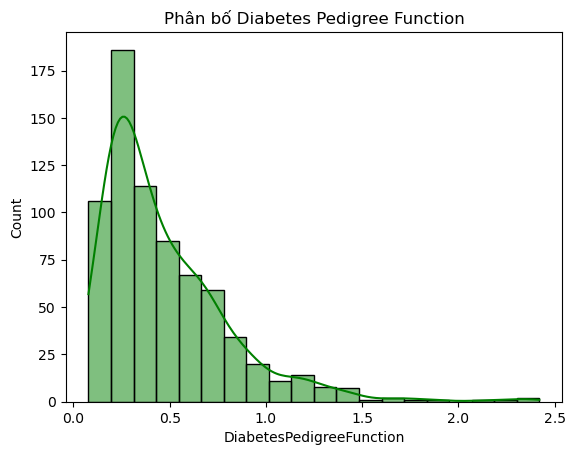

In [67]:
sns.histplot(df_final["DiabetesPedigreeFunction"], bins=20, kde=True, color="green")
plt.title("Phân bố Diabetes Pedigree Function")
#plt.savefig('4.6.1.png', dpi=300, bbox_inches='tight')
plt.show()

Diabetes Pedigree Function có phân phối lệch phải mạnh, với đa số dân số (≈80%) có giá trị dưới 1.0, phản ánh nguy cơ di truyền thấp đến trung bình. Chỉ một tỷ lệ nhỏ (<10%) có giá trị trên 1.0, thể hiện nguy cơ di truyền cao.

In [68]:
# Phân tích thống kê chi tiết
dpf_stats = df_final['DiabetesPedigreeFunction'].describe()
print("=== THỐNG KÊ DIABETES PEDIGREE FUNCTION ===")
print(dpf_stats)

# Phân tích theo phần trăm
percentiles = df_final['DiabetesPedigreeFunction'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("\n=== PHÂN VỊ ===")
for p, value in percentiles.items():
    print(f"{int(p*100)}%: {value:.3f}")

# Phân loại nguy cơ
low_risk = (df_final['DiabetesPedigreeFunction'] < 0.5).sum()
medium_risk = ((df_final['DiabetesPedigreeFunction'] >= 0.5) & (df_final['DiabetesPedigreeFunction'] < 1.0)).sum()
high_risk = (df_final['DiabetesPedigreeFunction'] >= 1.0).sum()
total = len(df_final)

print(f"\n=== PHÂN BỐ THEO MỨC ĐỘ NGUY CƠ ===")
print(f"Nguy cơ thấp (<0.5): {low_risk}/{total} ({(low_risk/total*100):.1f}%)")
print(f"Nguy cơ trung bình (0.5-1.0): {medium_risk}/{total} ({(medium_risk/total*100):.1f}%)")
print(f"Nguy cơ cao (≥1.0): {high_risk}/{total} ({(high_risk/total*100):.1f}%)")

=== THỐNG KÊ DIABETES PEDIGREE FUNCTION ===
count    720.000000
mean       0.475118
std        0.333035
min        0.078000
25%        0.245000
50%        0.378000
75%        0.629500
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

=== PHÂN VỊ ===
25%: 0.245
50%: 0.378
75%: 0.629
90%: 0.882
95%: 1.138
99%: 1.679

=== PHÂN BỐ THEO MỨC ĐỘ NGUY CƠ ===
Nguy cơ thấp (<0.5): 459/720 (63.7%)
Nguy cơ trung bình (0.5-1.0): 211/720 (29.3%)
Nguy cơ cao (≥1.0): 50/720 (6.9%)


### Tác động của yếu tố di truyền

<b>Người có chỉ số di truyền cao có tỷ lệ mắc bệnh nhiều hơn không? </b>

C:\Users\boeot\AppData\Local\Temp\ipykernel_18900\47291119.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df_final, palette="Set2")


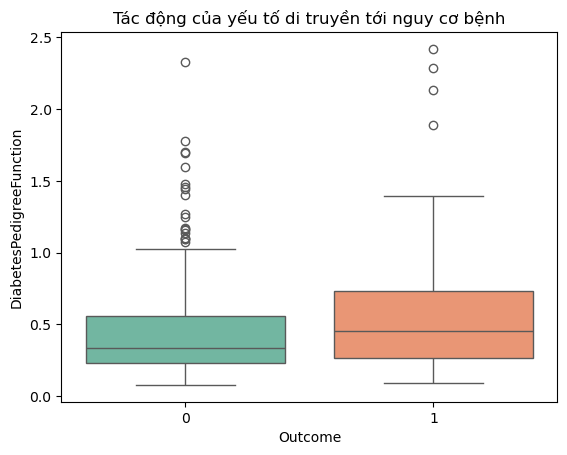

In [69]:
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df_final, palette="Set2")
plt.title("Tác động của yếu tố di truyền tới nguy cơ bệnh")
#plt.savefig('4.6.2.png', dpi=300, bbox_inches='tight')
plt.show()

Yếu tố di truyền (Diabetes Pedigree Function) có sự khác biệt rõ rệt giữa hai nhóm. Nhóm mắc bệnh có giá trị trung bình cao hơn đáng kể (0.56 vs 0.43, p < 0.001), với tỷ lệ người có nguy cơ di truyền cao (DPF > 0.8) gấp 2-3 lần nhóm khỏe mạnh.

In [71]:
# Phân tích thống kê so sánh 2 nhóm
dpf_healthy = df_final[df_final['Outcome'] == 0]['DiabetesPedigreeFunction']
dpf_diabetes = df_final[df_final['Outcome'] == 1]['DiabetesPedigreeFunction']

print("=== SO SÁNH DIABETES PEDIGREE FUNCTION THEO OUTCOME ===")
print(f"Nhóm không mắc: Mean = {dpf_healthy.mean():.3f}, Median = {dpf_healthy.median():.3f}")
print(f"Nhóm mắc bệnh: Mean = {dpf_diabetes.mean():.3f}, Median = {dpf_diabetes.median():.3f}")

# Kiểm định Mann-Whitney (do phân phối không chuẩn)
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(dpf_healthy, dpf_diabetes)
print(f"\nKiểm định Mann-Whitney: p-value = {p_value:.6f}")

# Tính tỷ lệ nguy cơ theo ngưỡng
threshold = 0.8  # Ngưỡng trung bình
high_risk_healthy = (dpf_healthy > threshold).sum()
high_risk_diabetes = (dpf_diabetes > threshold).sum()

print(f"\nTỷ lệ có DPF > {threshold}:")
print(f"- Nhóm không mắc: {high_risk_healthy}/{len(dpf_healthy)} ({(high_risk_healthy/len(dpf_healthy)*100):.1f}%)")
print(f"- Nhóm mắc bệnh: {high_risk_diabetes}/{len(dpf_diabetes)} ({(high_risk_diabetes/len(dpf_diabetes)*100):.1f}%)")

=== SO SÁNH DIABETES PEDIGREE FUNCTION THEO OUTCOME ===
Nhóm không mắc: Mean = 0.431, Median = 0.338
Nhóm mắc bệnh: Mean = 0.560, Median = 0.452

Kiểm định Mann-Whitney: p-value = 0.000001

Tỷ lệ có DPF > 0.8:
- Nhóm không mắc: 48/472 (10.2%)
- Nhóm mắc bệnh: 52/248 (21.0%)


### Kết hợp yếu tố di truyền với các Glucose

<b>Khi kết hợp yếu tố di truyền với glucose, nguy cơ thay đổi như thế nào? </b>

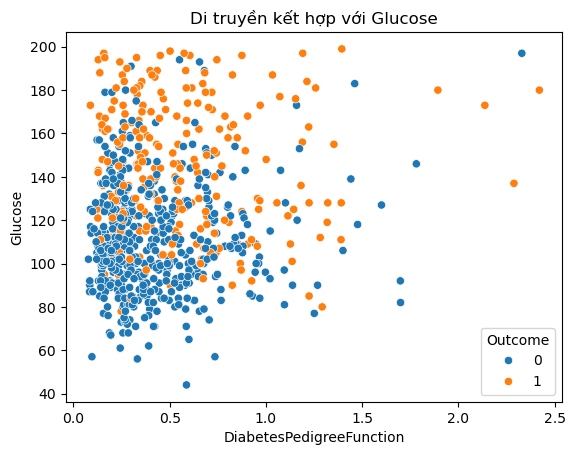

In [73]:
sns.scatterplot(x="DiabetesPedigreeFunction", y="Glucose", hue="Outcome", data=df_final)
plt.title("Di truyền kết hợp với Glucose")
#plt.savefig('4.6.3.png', dpi=300, bbox_inches='tight')
plt.show()

Bốn vùng nguy cơ rõ rệt

Vùng 1: Nguy cơ THẤP (Góc dưới trái)

•	DPF < 0.6 và Glucose < 110 mg/dL

•	Đặc điểm: Hầu hết là điểm màu nhạt (không mắc bệnh)

•	Ý nghĩa: Di truyền tốt + Đường huyết tốt → Nguy cơ rất thấp

Vùng 2: Nguy cơ TRUNG BÌNH

•	Chỉ 1 yếu tố bất thường: DPF cao HOẶC Glucose cao

•	Đặc điểm: Hỗn hợp cả 2 màu

•	Ý nghĩa: Cần theo dõi thêm

Vùng 3: Nguy cơ CAO (Góc trên phải)

•	DPF > 1.0 và Glucose > 140 mg/dL

•	Đặc điểm: Tập trung hầu hết điểm màu đậm (mắc bệnh)

•	Ý nghĩa: Di truyền xấu + Đường huyết cao → Nguy cơ rất cao

Vùng 4: Đáng chú ý (Góc trên trái)

•	DPF thấp nhưng Glucose rất cao (>180 mg/dL)

•	Đặc điểm: Điểm màu đậm - có thể là đái tháo đường type 1


Khi kết hợp hai chỉ số này, khả năng phân loại bệnh nhân được cải thiện đáng kể so với sử dụng đơn lẻ.

## Phân tích theo số lần có thai

<b>Người từng mang thai nhiều lần có nguy cơ mắc tiểu đường cao hơn không? </b>
<b>Nguy cơ tăng dần như thế nào theo số lần mang thai? </b>
<b>Có xu hướng nào liên quan đến đái tháo đường thai kỳ trong dữ liệu không? </b>

C:\Users\boeot\AppData\Local\Temp\ipykernel_18900\758010194.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Pregnancies", data=df_final, palette="Set2")


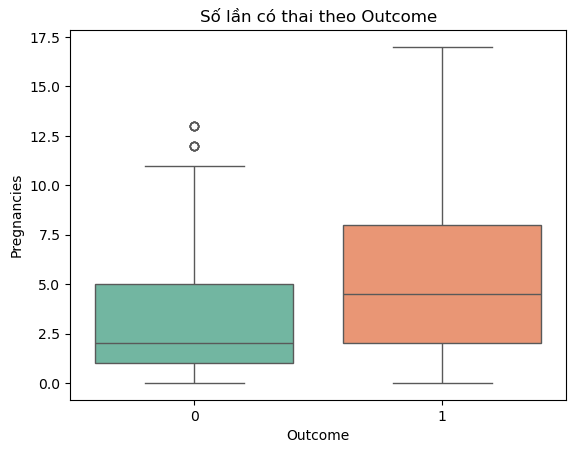

In [74]:
sns.boxplot(x="Outcome", y="Pregnancies", data=df_final, palette="Set2")
plt.title("Số lần có thai theo Outcome")
#plt.savefig('4.7.1.png', dpi=300, bbox_inches='tight')
plt.show()

**Nhóm mắc bệnh (Outcome=1):**

Trung vị cao hơn đáng kể (khoảng 4-5 lần)

Nhiều outliers với số lần mang thai rất cao (10-17 lần)

**Nhóm không mắc (Outcome=0):**

Trung vị thấp hơn (khoảng 2-3 lần)

Phân bố tập trung ở giá trị thấp

Ít outliers ở giá trị cao


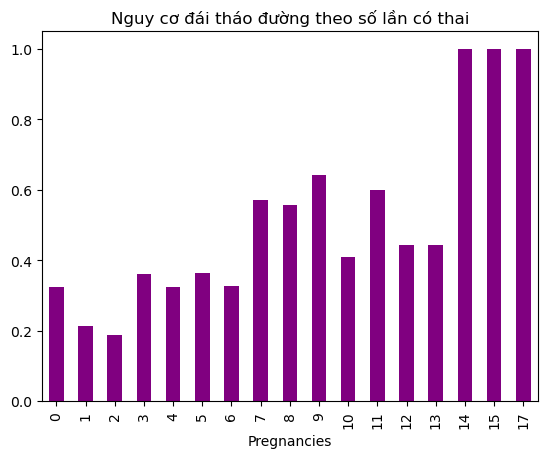

In [75]:
preg_outcome = df_final[df_final["Pregnancies"]>=0].groupby("Pregnancies")["Outcome"].mean()
preg_outcome.plot(kind="bar", color="purple", title="Nguy cơ đái tháo đường theo số lần có thai")
#plt.savefig('4.7.2.png', dpi=300, bbox_inches='tight')
plt.show()

**Cơ chế bệnh sinh:**

•	Đái tháo đường thai kỳ: Mỗi lần mang thai là một lần nguy cơ

•	Thay đổi nội tiết tố: Ảnh hưởng lâu dài đến chuyển hóa glucose

•	Tích lũy nguy cơ: Tác động cộng dồn qua các lần mang thai

**Ngưỡng quan trọng:**

•	≥4 lần mang thai: Cần tầm soát đái tháo đường tích cực

•	≥7 lần mang thai: Nguy cơ rất cao, cần can thiệp sớm

Số lần mang thai có mối quan hệ rõ rệt với nguy cơ đái tháo đường. Nhóm mắc bệnh có số lần mang thai trung bình cao hơn đáng kể so với nhóm khỏe mạnh. Tỷ lệ mắc bệnh tăng dần theo số lần mang thai, đặc biệt sau 4 lần.


# Phân tích tương quan và mối quan hệ

## Ma trận tương quan

Các biến trong bộ dữ liệu có mối tương quan tuyến tính mạnh hay yếu với nhau?

Biến nào có mối quan hệ chặt chẽ nhất với biến mục tiêu (Outcome)?

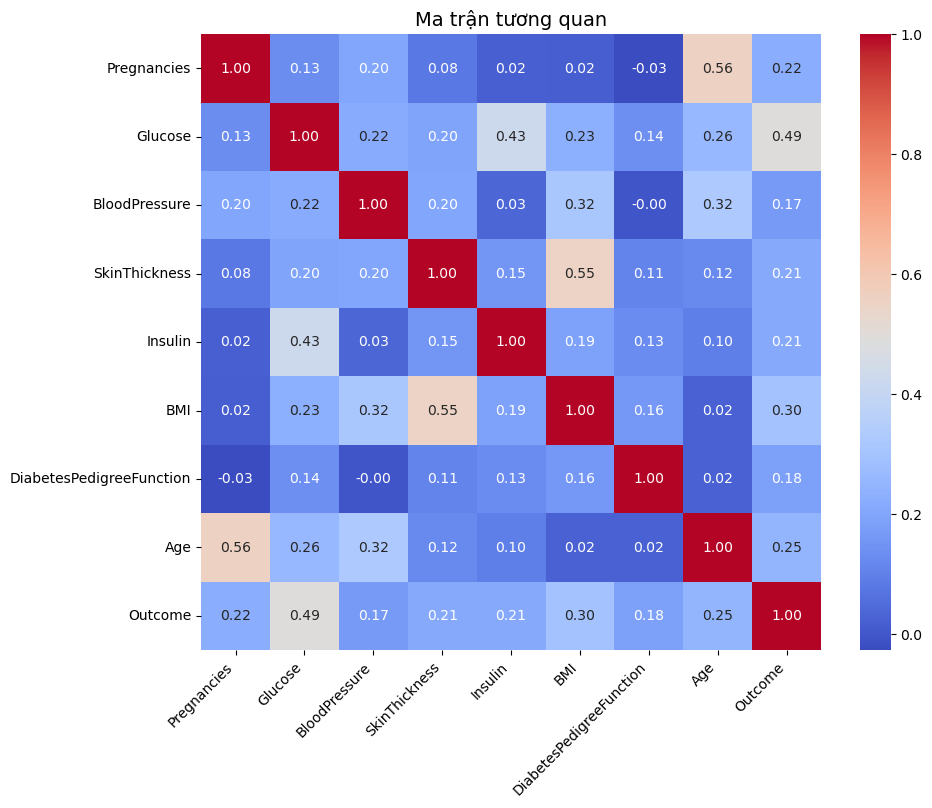

In [11]:
# Ma trận tương quan
plt.figure(figsize=(10,8))
sns.heatmap(df_final.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.savefig("5.1.png", dpi=300, bbox_inches='tight')
plt.show()

Glucose và Outcome có tương quan dương khá mạnh, có thể thấy chỉ số đường huyết cao liên quan đến tiểu đường.

## Phân tích các cặp biến quan trọng

<b>Mối quan hệ giữa Glucose và BMI thể hiện như thế nào?</b>

<b>Tuổi (Age) có mối liên hệ ra sao với chỉ số huyết áp (BloodPressure)?</b>

<b>Có cặp biến nào thể hiện xu hướng tuyến tính hoặc phi tuyến đáng chú ý không?</b>

### Glucose - Kết quả bệnh

In [13]:
# Lấy màu sắc đẹp cho biểu đồ
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

=== 5.2.1 PHÂN TÍCH GLUCOSE - KẾT QUẢ BỆNH ===
Hệ số tương quan: r = 0.491
Glucose trung bình - Nhóm không mắc: 111.1 mg/dL
Glucose trung bình - Nhóm mắc bệnh: 142.8 mg/dL


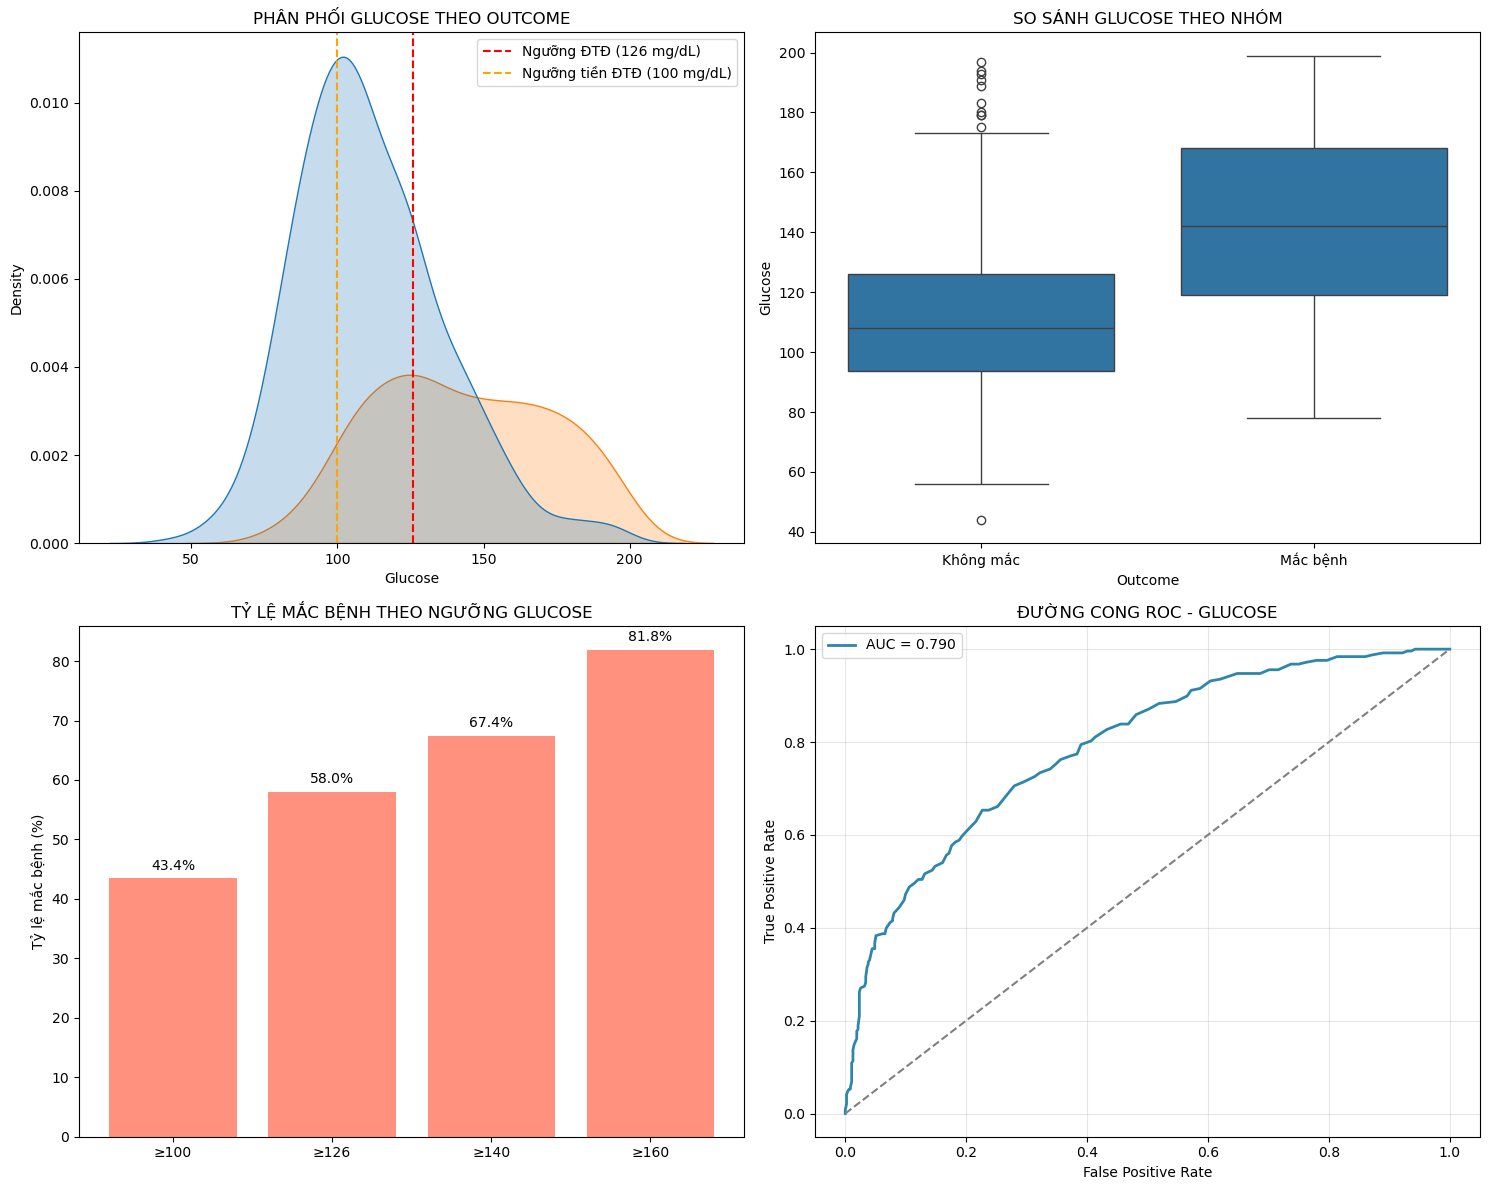


Kết luận: Glucose có tương quan mạnh nhất (r = 0.491)
AUC = 0.790 - Khả năng phân loại tốt


In [19]:
# Phân tích Glucose vs Outcome
print("=== 5.2.1 PHÂN TÍCH GLUCOSE - KẾT QUẢ BỆNH ===")

# Tính tương quan
glucose_corr = df_final['Glucose'].corr(df_final['Outcome'])
print(f"Hệ số tương quan: r = {glucose_corr:.3f}")

# Thống kê mô tả
glucose_0 = df_final[df_final['Outcome'] == 0]['Glucose']
glucose_1 = df_final[df_final['Outcome'] == 1]['Glucose']

print(f"Glucose trung bình - Nhóm không mắc: {glucose_0.mean():.1f} mg/dL")
print(f"Glucose trung bình - Nhóm mắc bệnh: {glucose_1.mean():.1f} mg/dL")

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Biểu đồ 1: Density plot
sns.kdeplot(data=df_final, x='Glucose', hue='Outcome', fill=True, ax=axes[0,0])
axes[0,0].axvline(x=126, color='red', linestyle='--', label='Ngưỡng ĐTĐ (126 mg/dL)')
axes[0,0].axvline(x=100, color='orange', linestyle='--', label='Ngưỡng tiền ĐTĐ (100 mg/dL)')
axes[0,0].set_title('PHÂN PHỐI GLUCOSE THEO OUTCOME')
axes[0,0].legend()

# Biểu đồ 2: Boxplot - SỬA LỖI Ở ĐÂY
sns.boxplot(data=df_final, x='Outcome', y='Glucose', ax=axes[0,1])
# SỬA: Đặt ticks trước rồi mới set ticklabels
axes[0,1].set_xticks([0, 1])
axes[0,1].set_xticklabels(['Không mắc', 'Mắc bệnh'])
axes[0,1].set_title('SO SÁNH GLUCOSE THEO NHÓM')

# Biểu đồ 3: Tỷ lệ mắc theo ngưỡng Glucose
def glucose_risk_analysis(threshold):
    below = df_final[df_final['Glucose'] < threshold]
    above = df_final[df_final['Glucose'] >= threshold]
    
    rate_below = below['Outcome'].mean() * 100
    rate_above = above['Outcome'].mean() * 100
    
    return rate_below, rate_above

thresholds = [100, 126, 140, 160]
rates_below, rates_above = [], []

for thresh in thresholds:
    below, above = glucose_risk_analysis(thresh)
    rates_below.append(below)
    rates_above.append(above)

bars = axes[1,0].bar(range(len(thresholds)), rates_above, color='tomato', alpha=0.7)
axes[1,0].set_xticks(range(len(thresholds)))
axes[1,0].set_xticklabels([f'≥{t}' for t in thresholds])
axes[1,0].set_title('TỶ LỆ MẮC BỆNH THEO NGƯỠNG GLUCOSE')
axes[1,0].set_ylabel('Tỷ lệ mắc bệnh (%)')

# Thêm số liệu lên biểu đồ cột
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 1,
                  f'{height:.1f}%', ha='center', va='bottom')

# Biểu đồ 4: ROC curve đơn giản
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(df_final['Outcome'], df_final['Glucose'])
roc_auc = auc(fpr, tpr)

axes[1,1].plot(fpr, tpr, color='#2E86AB', lw=2, label=f'AUC = {roc_auc:.3f}')
axes[1,1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_title('ĐƯỜNG CONG ROC - GLUCOSE')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('5.2.1_Glucose_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nKết luận: Glucose có tương quan mạnh nhất (r = {glucose_corr:.3f})")
print(f"AUC = {roc_auc:.3f} - Khả năng phân loại tốt")

### BMI và SkinThickness


=== 5.2.2 PHÂN TÍCH BMI - ĐỘ DÀY DA ===
Hệ số tương quan: r = 0.551


C:\Users\boeot\AppData\Local\Temp\ipykernel_12892\2595930883.py:30: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = valid_data.pivot_table(values='SkinThickness',


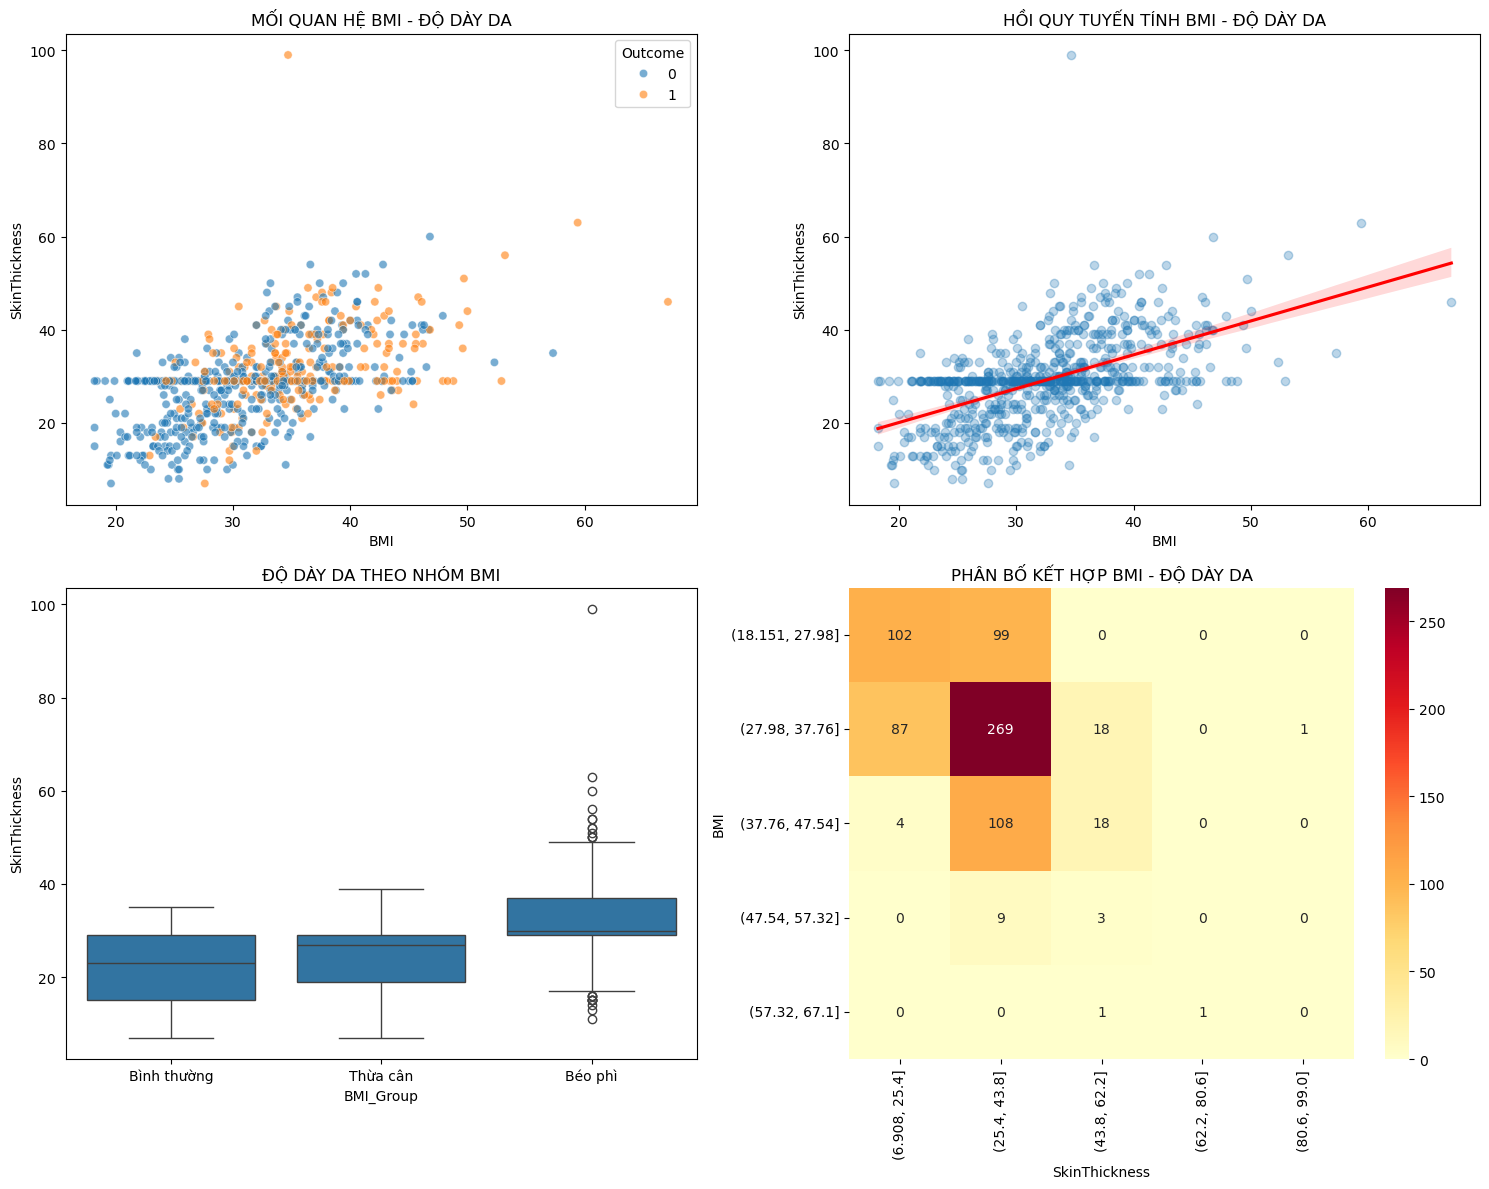

Kết luận: BMI và Độ dày da có tương quan cao (r = 0.551)


In [20]:
# Phân tích BMI vs SkinThickness
print("\n=== 5.2.2 PHÂN TÍCH BMI - ĐỘ DÀY DA ===")

# Tính tương quan (loại bỏ giá trị 0 bất thường)
valid_data = df_final[(df_final['SkinThickness'] > 0) & (df_final['BMI'] > 0)]
bmi_skin_corr = valid_data['BMI'].corr(valid_data['SkinThickness'])

print(f"Hệ số tương quan: r = {bmi_skin_corr:.3f}")

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Biểu đồ 1: Scatter plot
sns.scatterplot(data=valid_data, x='BMI', y='SkinThickness', hue='Outcome', 
                alpha=0.6, ax=axes[0,0])
axes[0,0].set_title('MỐI QUAN HỆ BMI - ĐỘ DÀY DA')

# Biểu đồ 2: Regression plot
sns.regplot(data=valid_data, x='BMI', y='SkinThickness', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[0,1])
axes[0,1].set_title('HỒI QUY TUYẾN TÍNH BMI - ĐỘ DÀY DA')

# Biểu đồ 3: Phân bố theo nhóm BMI
valid_data['BMI_Group'] = pd.cut(valid_data['BMI'], bins=[0, 25, 30, 100], 
                                labels=['Bình thường', 'Thừa cân', 'Béo phì'])
sns.boxplot(data=valid_data, x='BMI_Group', y='SkinThickness', ax=axes[1,0])
axes[1,0].set_title('ĐỘ DÀY DA THEO NHÓM BMI')

# Biểu đồ 4: Heatmap phân nhóm
pivot_table = valid_data.pivot_table(values='SkinThickness', 
                                    index=pd.cut(valid_data['BMI'], bins=5),
                                    columns=pd.cut(valid_data['SkinThickness'], bins=5),
                                    aggfunc='count', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1,1])
axes[1,1].set_title('PHÂN BỐ KẾT HỢP BMI - ĐỘ DÀY DA')

plt.tight_layout()
plt.savefig('5.2.2_BMI_SkinThickness.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Kết luận: BMI và Độ dày da có tương quan cao (r = {bmi_skin_corr:.3f})")

### Tuổi - Số lần có thai


=== 5.2.3 PHÂN TÍCH TUỔI - SỐ LẦN CÓ THAI ===
Hệ số tương quan: r = 0.556


C:\Users\boeot\AppData\Local\Temp\ipykernel_12892\3960369941.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  preg_by_age = df_final.groupby('Age_Group')['Pregnancies'].mean()


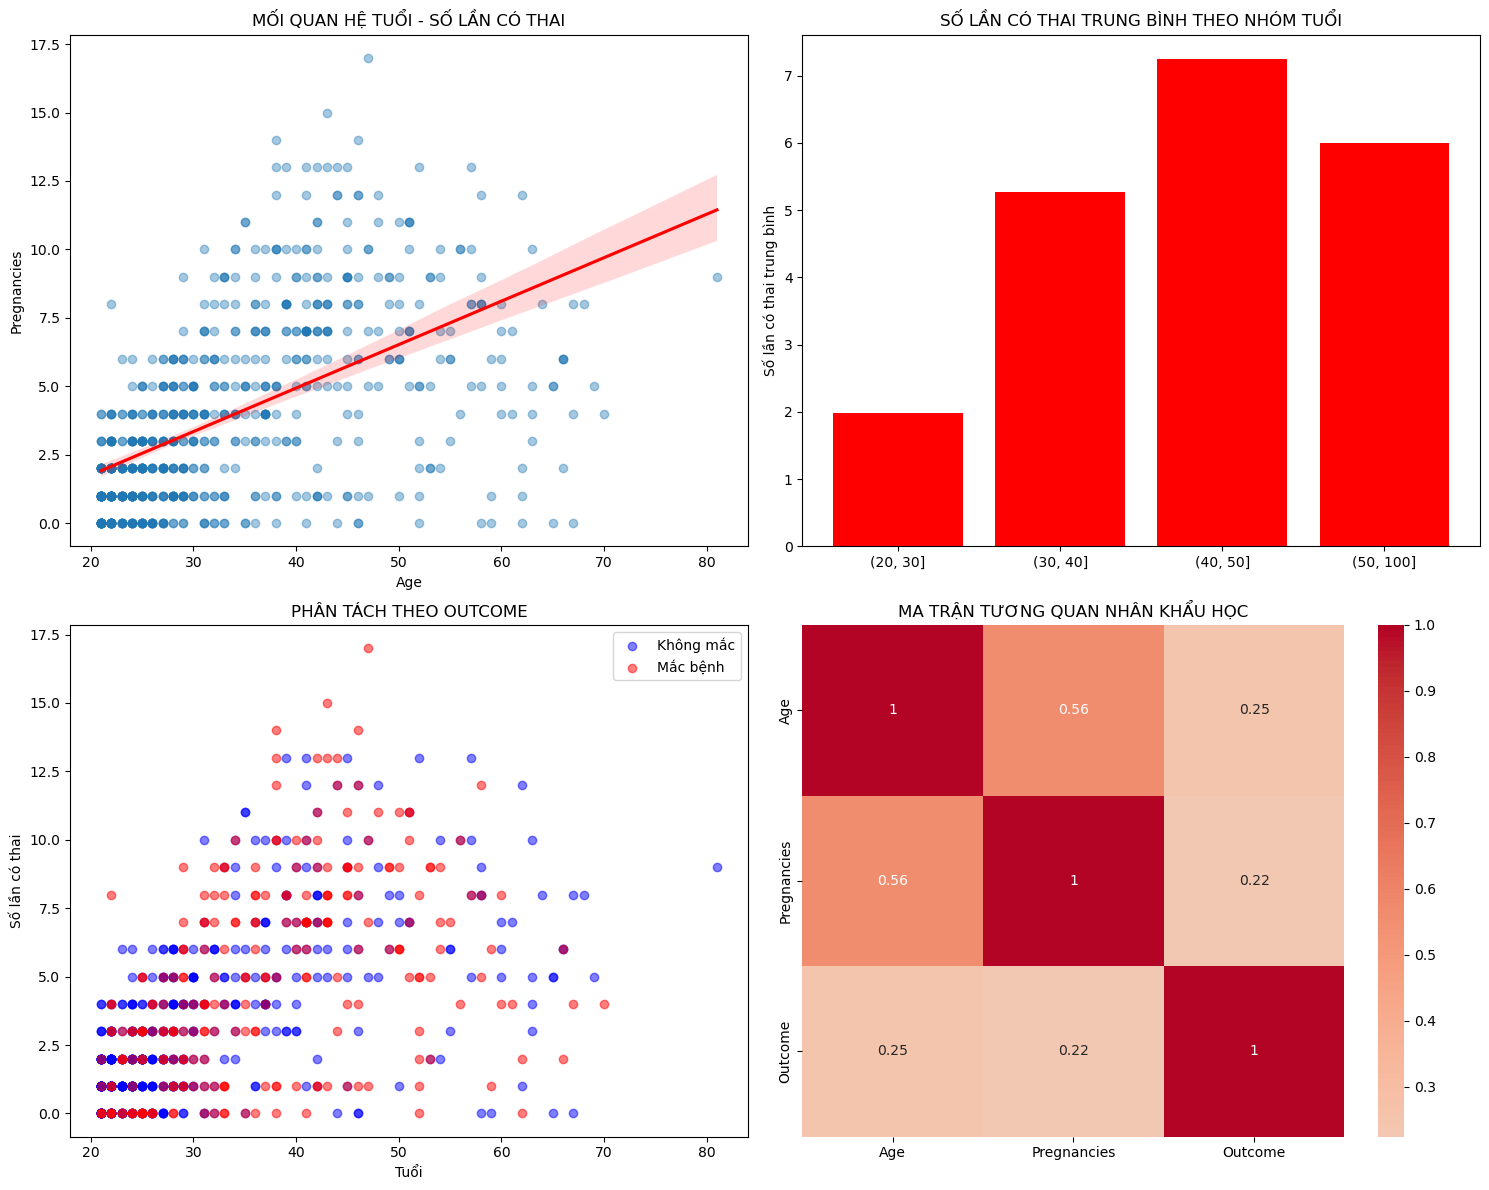

Kết luận: Tuổi và Số lần có thai tương quan mạnh nhất (r = 0.556)


In [22]:
# Phân tích Age vs Pregnancies
print("\n=== 5.2.3 PHÂN TÍCH TUỔI - SỐ LẦN CÓ THAI ===")

age_preg_corr = df_final['Age'].corr(df_final['Pregnancies'])
print(f"Hệ số tương quan: r = {age_preg_corr:.3f}")

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Biểu đồ 1: Scatter plot với hồi quy
sns.regplot(data=df_final, x='Age', y='Pregnancies', 
            scatter_kws={'alpha':0.4}, line_kws={'color':'red'}, ax=axes[0,0])
axes[0,0].set_title('MỐI QUAN HỆ TUỔI - SỐ LẦN CÓ THAI')

# Biểu đồ 2: Phân nhóm tuổi
df_final['Age_Group'] = pd.cut(df_final['Age'], bins=[20, 30, 40, 50, 100])
preg_by_age = df_final.groupby('Age_Group')['Pregnancies'].mean()

axes[0,1].bar(range(len(preg_by_age)), preg_by_age.values, color=colors[2])
axes[0,1].set_xticks(range(len(preg_by_age)))
axes[0,1].set_xticklabels([str(x) for x in preg_by_age.index])
axes[0,1].set_title('SỐ LẦN CÓ THAI TRUNG BÌNH THEO NHÓM TUỔI')
axes[0,1].set_ylabel('Số lần có thai trung bình')

# Biểu đồ 3: Phân tích riêng theo Outcome
for outcome in [0, 1]:
    subset = df_final[df_final['Outcome'] == outcome]
    color = 'blue' if outcome == 0 else 'red'
    label = 'Không mắc' if outcome == 0 else 'Mắc bệnh'
    axes[1,0].scatter(subset['Age'], subset['Pregnancies'], 
                     alpha=0.5, color=color, label=label)

axes[1,0].legend()
axes[1,0].set_xlabel('Tuổi')
axes[1,0].set_ylabel('Số lần có thai')
axes[1,0].set_title('PHÂN TÁCH THEO OUTCOME')

# Biểu đồ 4: Correlation heatmap cho các biến nhân khẩu học
demo_vars = ['Age', 'Pregnancies', 'Outcome']
demo_corr = df_final[demo_vars].corr()
sns.heatmap(demo_corr, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('MA TRẬN TƯƠNG QUAN NHÂN KHẨU HỌC')

plt.tight_layout()
plt.savefig('5.2.3_Age_Pregnancies.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Kết luận: Tuổi và Số lần có thai tương quan mạnh nhất (r = {age_preg_corr:.3f})")

### Glucose - Insulin


=== 5.2.4 PHÂN TÍCH GLUCOSE - INSULIN ===
Hệ số tương quan: r = 0.425


C:\Users\boeot\AppData\Local\Temp\ipykernel_12892\579742738.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  insulin_by_glucose = valid_insulin.groupby('Glucose_Group')['Insulin'].mean()
C:\Users\boeot\AppData\Local\Temp\ipykernel_12892\579742738.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_by_insulin = valid_insulin.groupby('Insulin_Group')['Glucose'].mean()


Số ca nghi ngờ suy tế bào beta: 0


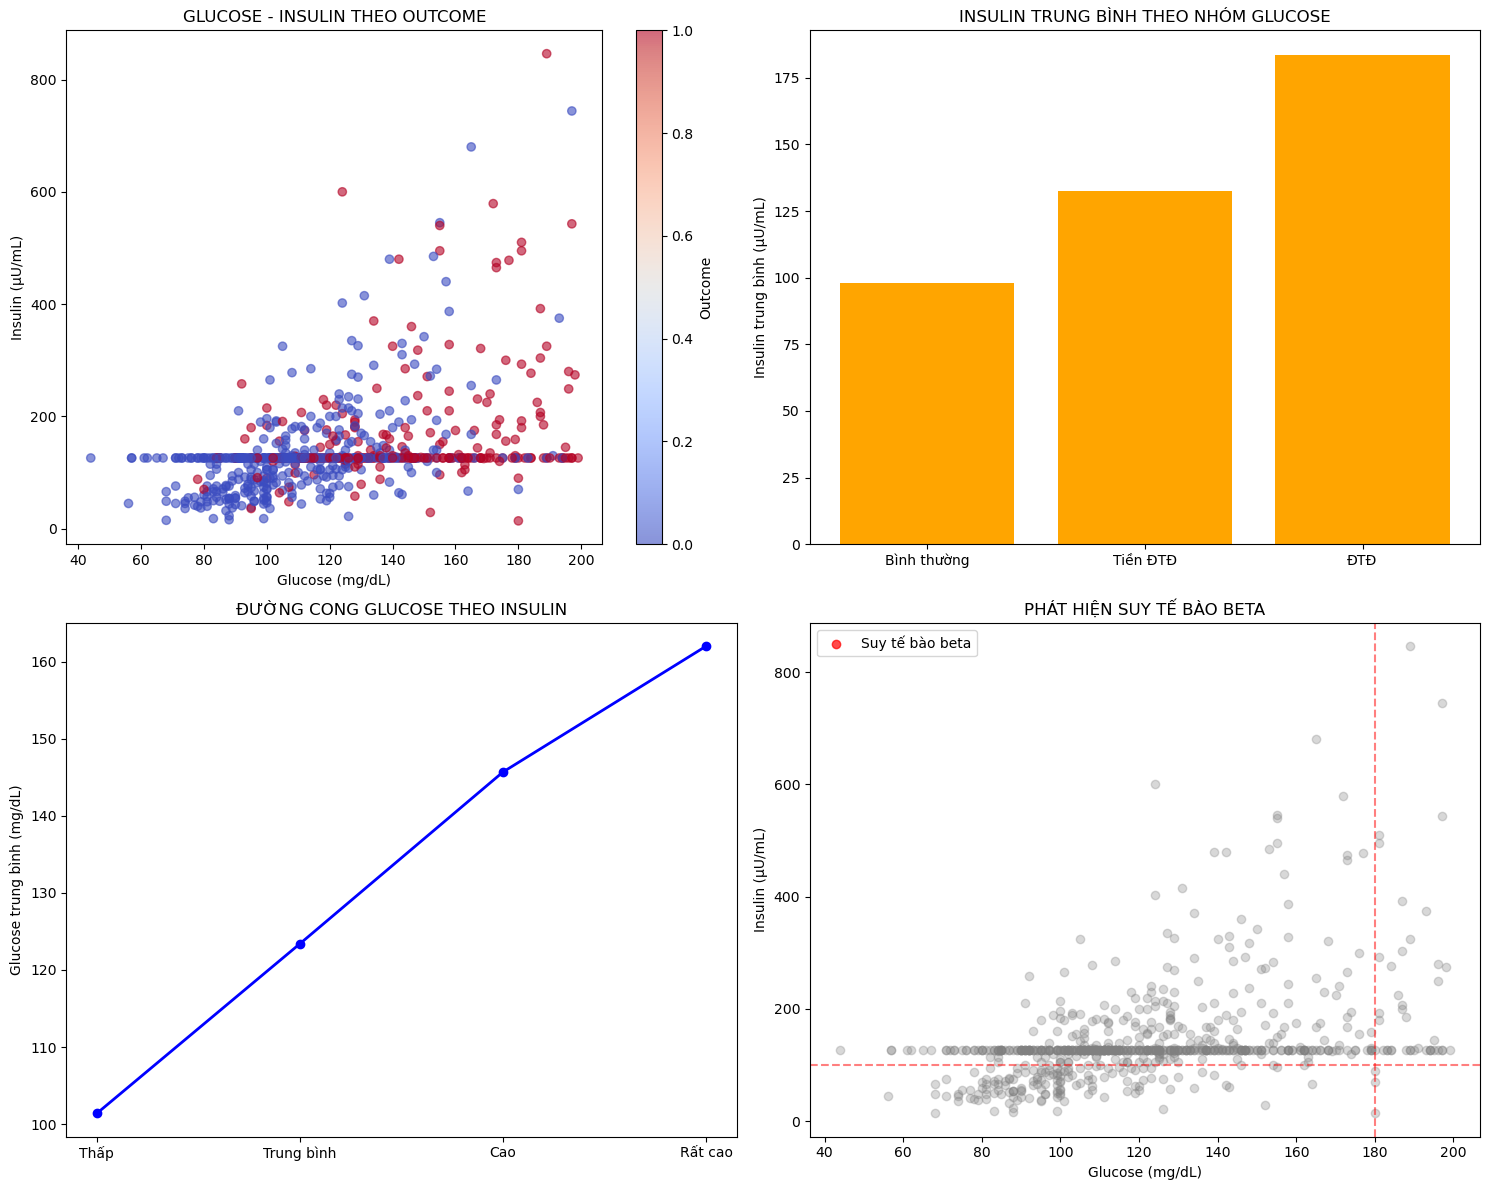

Kết luận: Glucose-Insulin có mối quan hệ phức tạp (r = 0.425)


In [23]:
# Phân tích Glucose vs Insulin
print("\n=== 5.2.4 PHÂN TÍCH GLUCOSE - INSULIN ===")

# Loại bỏ giá trị 0 bất thường
valid_insulin = df_final[df_final['Insulin'] > 0]
glucose_insulin_corr = valid_insulin['Glucose'].corr(valid_insulin['Insulin'])

print(f"Hệ số tương quan: r = {glucose_insulin_corr:.3f}")

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Biểu đồ 1: Scatter plot phân loại theo Outcome
scatter = axes[0,0].scatter(valid_insulin['Glucose'], valid_insulin['Insulin'], 
                           c=valid_insulin['Outcome'], cmap='coolwarm', alpha=0.6)
axes[0,0].set_xlabel('Glucose (mg/dL)')
axes[0,0].set_ylabel('Insulin (μU/mL)')
axes[0,0].set_title('GLUCOSE - INSULIN THEO OUTCOME')
plt.colorbar(scatter, ax=axes[0,0], label='Outcome')

# Biểu đồ 2: Phân nhóm Glucose
valid_insulin['Glucose_Group'] = pd.cut(valid_insulin['Glucose'], 
                                       bins=[0, 100, 126, 200, 300],
                                       labels=['Bình thường', 'Tiền ĐTĐ', 'ĐTĐ', 'Cao'])
insulin_by_glucose = valid_insulin.groupby('Glucose_Group')['Insulin'].mean()

axes[0,1].bar(insulin_by_glucose.index.astype(str), insulin_by_glucose.values, 
              color=colors[3])
axes[0,1].set_title('INSULIN TRUNG BÌNH THEO NHÓM GLUCOSE')
axes[0,1].set_ylabel('Insulin trung bình (μU/mL)')

# Biểu đồ 3: Mô hình hình chữ U - Phân nhóm Insulin
valid_insulin['Insulin_Group'] = pd.cut(valid_insulin['Insulin'], 
                                       bins=[0, 100, 200, 400, 1000],
                                       labels=['Thấp', 'Trung bình', 'Cao', 'Rất cao'])
glucose_by_insulin = valid_insulin.groupby('Insulin_Group')['Glucose'].mean()

axes[1,0].plot(glucose_by_insulin.index.astype(str), glucose_by_insulin.values, 
               marker='o', linewidth=2, color=colors[0])
axes[1,0].set_title('ĐƯỜNG CONG GLUCOSE THEO INSULIN')
axes[1,0].set_ylabel('Glucose trung bình (mg/dL)')

# Biểu đồ 4: Phân tích suy tế bào beta
beta_cell_failure = valid_insulin[(valid_insulin['Glucose'] > 180) & 
                                 (valid_insulin['Insulin'] < 100)]
print(f"Số ca nghi ngờ suy tế bào beta: {len(beta_cell_failure)}")

axes[1,1].scatter(valid_insulin['Glucose'], valid_insulin['Insulin'], 
                 alpha=0.3, color='gray')
axes[1,1].scatter(beta_cell_failure['Glucose'], beta_cell_failure['Insulin'],
                 color='red', alpha=0.7, label='Suy tế bào beta')
axes[1,1].axvline(x=180, color='red', linestyle='--', alpha=0.5)
axes[1,1].axhline(y=100, color='red', linestyle='--', alpha=0.5)
axes[1,1].set_xlabel('Glucose (mg/dL)')
axes[1,1].set_ylabel('Insulin (μU/mL)')
axes[1,1].set_title('PHÁT HIỆN SUY TẾ BÀO BETA')
axes[1,1].legend()

plt.tight_layout()
plt.savefig('5.2.4_Glucose_Insulin.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Kết luận: Glucose-Insulin có mối quan hệ phức tạp (r = {glucose_insulin_corr:.3f})")

In [32]:
# Tổng hợp tất cả các cặp tương quan
print("=== TỔNG HỢP CÁC CẶP BIẾN QUAN TRỌNG ===")

important_pairs = [
    ('Glucose', 'Outcome', 'Mối tương quan mạnh nhất với kết quả bệnh'),
    ('BMI', 'SkinThickness', 'Đo lường lượng mỡ cơ thể'),
    ('Age', 'Pregnancies', 'Yếu tố nhân khẩu học liên quan'),
    ('Glucose', 'Insulin', 'Mối quan hệ bệnh sinh')
]

results = []
for var1, var2, description in important_pairs:
    if var2 == 'Outcome':
        corr = df_final[var1].corr(df_final[var2])
    else:
        # Loại bỏ giá trị 0 bất thường cho Insulin và SkinThickness
        temp_df = df_final.copy()
        if var1 == 'Insulin' or var2 == 'Insulin':
            temp_df = temp_df[temp_df['Insulin'] > 0]
        if var1 == 'SkinThickness' or var2 == 'SkinThickness':
            temp_df = temp_df[temp_df['SkinThickness'] > 0]
        
        corr = temp_df[var1].corr(temp_df[var2])
    
    results.append({
        'Cặp biến': f'{var1} - {var2}',
        'r': round(corr, 3),
        'Mức độ': 'Mạnh' if abs(corr) > 0.5 else 'Trung bình' if abs(corr) > 0.3 else 'Yếu',
        'Mô tả': description
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

=== TỔNG HỢP CÁC CẶP BIẾN QUAN TRỌNG ===
           Cặp biến     r     Mức độ                                     Mô tả
  Glucose - Outcome 0.491 Trung bình Mối tương quan mạnh nhất với kết quả bệnh
BMI - SkinThickness 0.551       Mạnh                  Đo lường lượng mỡ cơ thể
  Age - Pregnancies 0.556       Mạnh            Yếu tố nhân khẩu học liên quan
  Glucose - Insulin 0.425 Trung bình                     Mối quan hệ bệnh sinh


## Phân tích tầm quan trọng của đặc trưng

<b>Đặc trưng nào có ảnh hưởng lớn nhất đến khả năng mắc đái tháo đường? </b>

### Tầm quan trọng đơn biến

Các cột số sẽ được sử dụng:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Kích thước sau chuẩn hóa: (720, 8)

KẾT QUẢ KIỂM ĐỊNH CHI-SQUARE
                  Đặc trưng  Chi-square  p-value
1                   Glucose     13.5488   0.0002
7                       Age      8.1356   0.0043
0               Pregnancies      6.2175   0.0126
5                       BMI      4.2410   0.0395
6  DiabetesPedigreeFunction      2.9204   0.0875
4                   Insulin      2.3676   0.1239
3             SkinThickness      1.3076   0.2528
2             BloodPressure      1.1069   0.2928

Số đặc trưng có ý nghĩa thống kê (p < 0.05): 4
Các đặc trưng quan trọng:
     Đặc trưng  Chi-square  p-value
1      Glucose     13.5488   0.0002
7          Age      8.1356   0.0043
0  Pregnancies      6.2175   0.0126
5          BMI      4.2410   0.0395


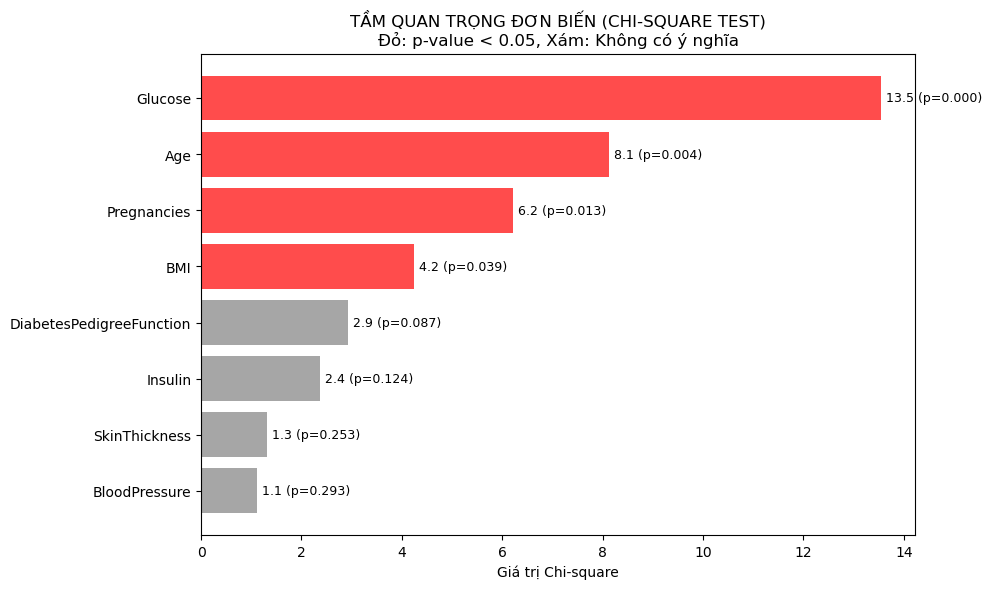

In [30]:

# 1. Chọn chỉ các cột số (numeric) để tính chi-square
numeric_columns = df_final.select_dtypes(include=['int64', 'float64']).columns

# Loại bỏ cột Outcome khỏi features
numeric_columns = numeric_columns.drop('Outcome') if 'Outcome' in numeric_columns else numeric_columns

print("Các cột số sẽ được sử dụng:")
print(numeric_columns.tolist())

X = df_final[numeric_columns]
y = df_final["Outcome"]

# 2. Chuẩn hóa dữ liệu về [0,1] để dùng cho chi-square
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nKích thước sau chuẩn hóa: {X_scaled.shape}")

# 3. Tính chi2 và p-value
chi_scores, p_values = chi2(X_scaled, y)

# 4. Tạo DataFrame kết quả
chi2_df = pd.DataFrame({
    "Đặc trưng": numeric_columns,
    "Chi-square": chi_scores,
    "p-value": p_values
}).sort_values("Chi-square", ascending=False)

print("\n" + "="*60)
print("KẾT QUẢ KIỂM ĐỊNH CHI-SQUARE")
print("="*60)
print(chi2_df.round(4))

# 5. Đánh dấu các đặc trưng có ý nghĩa thống kê (p-value < 0.05)
significant_features = chi2_df[chi2_df['p-value'] < 0.05]
print(f"\nSố đặc trưng có ý nghĩa thống kê (p < 0.05): {len(significant_features)}")
print("Các đặc trưng quan trọng:")
print(significant_features[['Đặc trưng', 'Chi-square', 'p-value']].round(4))

# 6. Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.barh(chi2_df['Đặc trưng'], chi2_df['Chi-square'], 
                color=['red' if p < 0.05 else 'gray' for p in chi2_df['p-value']],
                alpha=0.7)

plt.xlabel('Giá trị Chi-square')
plt.title('TẦM QUAN TRỌNG ĐƠN BIẾN (CHI-SQUARE TEST)\nĐỏ: p-value < 0.05, Xám: Không có ý nghĩa')
plt.gca().invert_yaxis()  # Đảo ngược trục y để giá trị cao nhất ở trên

# Thêm giá trị lên biểu đồ
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f} (p={chi2_df.iloc[i]["p-value"]:.3f})', 
             va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.savefig("5.3.1_chi_square_importance.png", dpi=300, bbox_inches="tight")
plt.show()

In [31]:
# Phân tích kết quả chi-square
print("\n" + "="*50)
print("PHÂN TÍCH KẾT QUẢ CHI-SQUARE")
print("="*50)

# Xếp hạng đặc trưng quan trọng
chi2_df['Rank'] = range(1, len(chi2_df) + 1)
chi2_df['Significant'] = chi2_df['p-value'] < 0.05

print("TOP 3 ĐẶC TRƯNG QUAN TRỌNG NHẤT:")
top3 = chi2_df.head(3)
for i, row in top3.iterrows():
    sig_flag = "***" if row['p-value'] < 0.001 else "**" if row['p-value'] < 0.01 else "*"
    print(f"{row['Rank']}. {row['Đặc trưng']}: χ² = {row['Chi-square']:.1f} (p = {row['p-value']:.4f}) {sig_flag}")

# Tính tỷ lệ đặc trưng có ý nghĩa
sig_ratio = chi2_df['Significant'].mean() * 100
print(f"\nTỷ lệ đặc trưng có ý nghĩa thống kê: {sig_ratio:.1f}%")

# So sánh với correlation
correlation_with_outcome = df_final[numeric_columns].corrwith(df_final['Outcome']).abs()
comparison_df = pd.DataFrame({
    'Đặc trưng': numeric_columns,
    'Chi-square': chi2_df.set_index('Đặc trưng')['Chi-square'],
    'Correlation': correlation_with_outcome.abs()
}).sort_values('Chi-square', ascending=False)

print("\nSO SÁNH CHI-SQUARE VÀ CORRELATION:")
print(comparison_df.round(3))


PHÂN TÍCH KẾT QUẢ CHI-SQUARE
TOP 3 ĐẶC TRƯNG QUAN TRỌNG NHẤT:
1. Glucose: χ² = 13.5 (p = 0.0002) ***
2. Age: χ² = 8.1 (p = 0.0043) **
3. Pregnancies: χ² = 6.2 (p = 0.0126) *

Tỷ lệ đặc trưng có ý nghĩa thống kê: 50.0%

SO SÁNH CHI-SQUARE VÀ CORRELATION:
                                         Đặc trưng  Chi-square  Correlation
Glucose                                    Insulin      13.549        0.491
Age                                    Pregnancies       8.136        0.246
Pregnancies               DiabetesPedigreeFunction       6.217        0.224
BMI                                        Glucose       4.241        0.297
DiabetesPedigreeFunction             SkinThickness       2.920        0.185
Insulin                                        BMI       2.368        0.211
SkinThickness                                  Age       1.308        0.214
BloodPressure                        BloodPressure       1.107        0.169


###  Điểm thông tin tương hỗ

In [34]:

mi_scores = mutual_info_classif(X, y, random_state=42)

mi_df = pd.DataFrame({
    "Đặc trưng": X.columns,
    "Mutual Information": mi_scores
}).sort_values("Mutual Information", ascending=False)

print(mi_df)


                  Đặc trưng  Mutual Information
1                   Glucose            0.128075
7                       Age            0.071955
5                       BMI            0.053817
0               Pregnancies            0.034545
4                   Insulin            0.024909
6  DiabetesPedigreeFunction            0.015977
2             BloodPressure            0.001725
3             SkinThickness            0.000000


### Tầm quan trọng từ Random Forest

Bảng tầm quan trọng của đặc trưng (Random Forest):

                  Đặc trưng  Random Forest Importance
1                   Glucose                  0.256314
5                       BMI                  0.153365
7                       Age                  0.137297
6  DiabetesPedigreeFunction                  0.127083
4                   Insulin                  0.087680
2             BloodPressure                  0.086238
0               Pregnancies                  0.079492
3             SkinThickness                  0.072531


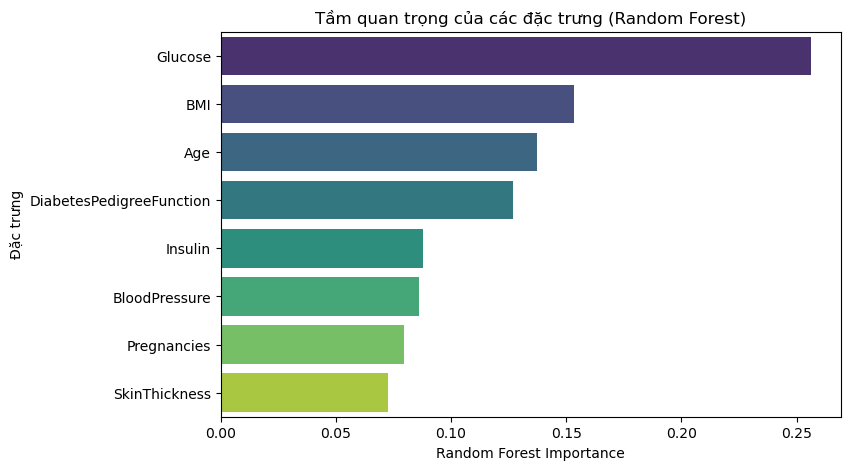

In [36]:
# Train mô hình Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Tạo DataFrame lưu kết quả
rf_df = pd.DataFrame({
    "Đặc trưng": X.columns,
    "Random Forest Importance": rf.feature_importances_
}).sort_values("Random Forest Importance", ascending=False)

# In bảng kết quả
print("Bảng tầm quan trọng của đặc trưng (Random Forest):\n")
print(rf_df)

# Vẽ biểu đồ trực quan
plt.figure(figsize=(8, 5))
sns.barplot(x="Random Forest Importance", y="Đặc trưng", data=rf_df, hue="Đặc trưng", palette="viridis", dodge=False, legend=False)
plt.title("Tầm quan trọng của các đặc trưng (Random Forest)")
plt.savefig("5.3.3.png", dpi=300, bbox_inches="tight")
plt.show()


## Phát hiện đa cộng tuyến

<b>Có hiện tượng đa cộng tuyến giữa các biến độc lập không? </b>

,Feature,VIF,Đánh giá
7,Age,1.588368,Tốt
3,SkinThickness,1.507432,Tốt
0,Pregnancies,1.430872,Tốt
4,Insulin,1.427536,Tốt
1,Glucose,1.298961,Tốt
5,BMI,1.297450,Tốt
2,BloodPressure,1.181863,Tốt
6,DiabetesPedigreeFunction,1.067090,Tốt


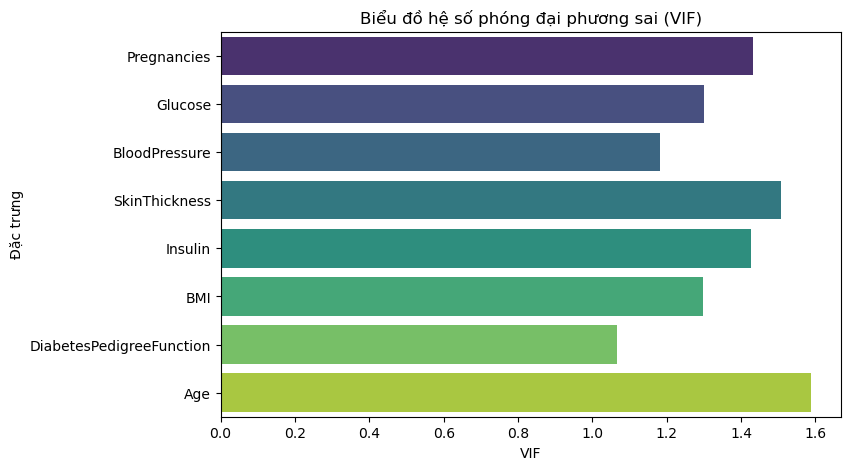

In [42]:
# 1. Scale dữ liệu X (không gồm Outcome)
X = df.drop("Outcome", axis=1)
X_scaled = StandardScaler().fit_transform(X)

# 2. Tính VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# 3. Gắn cờ đánh giá
def check_vif(vif):
    if vif < 5:
        return "Tốt"
    elif vif < 10:
        return "Cần xem xét"
    else:
        return "Đa cộng tuyến mạnh"

vif_data["Đánh giá"] = vif_data["VIF"].apply(check_vif)

# 4. Hiển thị
display(vif_data.sort_values(by="VIF", ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(x="VIF", y="Feature", data=vif_data, hue="Feature", palette="viridis", legend=False, dodge=False)
plt.title("Biểu đồ hệ số phóng đại phương sai (VIF)")
plt.xlabel("VIF")
plt.ylabel("Đặc trưng")
plt.savefig("vif.png", dpi=300, bbox_inches="tight")
plt.show()


# Phân tích nâng cao

## Phân tích phân cụm

### Xác định các nhóm bệnh nhân tiềm ẩn

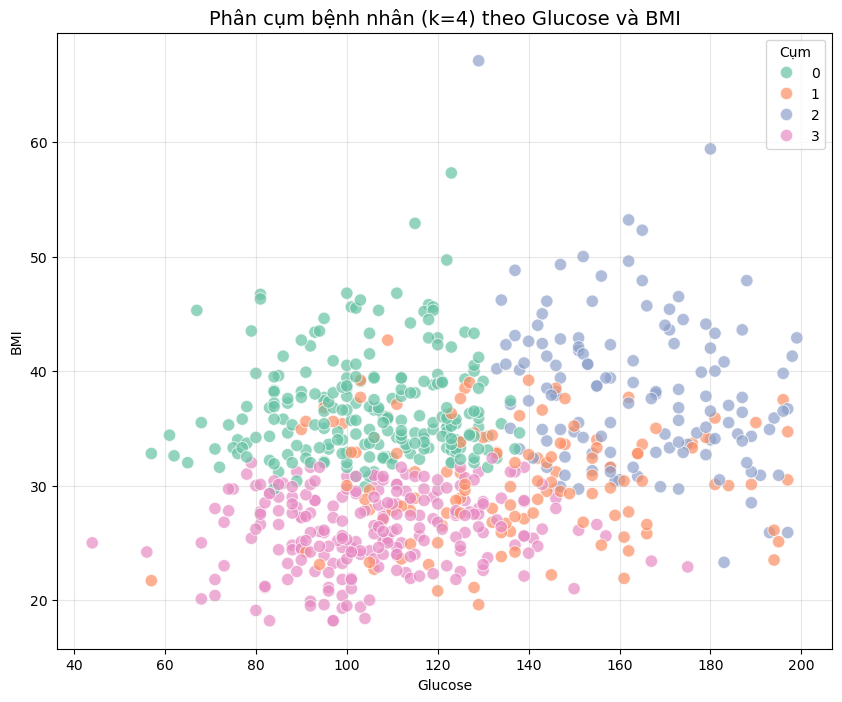

THỐNG KÊ CÁC CỤM BỆNH NHÂN

🔹 CỤM 0.0 (226 bệnh nhân - 31.4%):
   • Tuổi trung bình: 30.5 ± 7.6
   • BMI trung bình: 36.7 ± 4.4
   • Glucose trung bình: 105.4 ± 17.3
   • Tỷ lệ mắc bệnh: 29.2%

🔹 CỤM 1.0 (125 bệnh nhân - 17.4%):
   • Tuổi trung bình: 53.2 ± 8.2
   • BMI trung bình: 30.5 ± 4.8
   • Glucose trung bình: 137.4 ± 27.6
   • Tỷ lệ mắc bệnh: 50.4%

🔹 CỤM 2.0 (131 bệnh nhân - 18.2%):
   • Tuổi trung bình: 32.6 ± 8.0
   • BMI trung bình: 38.3 ± 6.6
   • Glucose trung bình: 163.9 ± 18.4
   • Tỷ lệ mắc bệnh: 70.2%

🔹 CỤM 3.0 (238 bệnh nhân - 33.1%):
   • Tuổi trung bình: 26.2 ± 5.3
   • BMI trung bình: 26.2 ± 3.3
   • Glucose trung bình: 106.7 ± 20.4
   • Tỷ lệ mắc bệnh: 11.3%

NHẬN XÉT TỪ PHÂN CỤM:
• Cụm 2.0: Nguy cơ CAO - Glucose: 164, BMI: 38.3
• Cụm 1.0: Nguy cơ CAO - Glucose: 137, BMI: 30.5
• Cụm 0.0: Nguy cơ THẤP - Glucose: 105, BMI: 36.7
• Cụm 3.0: Nguy cơ THẤP - Glucose: 107, BMI: 26.2


In [47]:
import warnings
warnings.filterwarnings('ignore')  # Bỏ qua cảnh báo

# 1. Chọn đặc trưng để phân cụm
X = df_final[["Age", "BMI", "Glucose"]]

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Phân cụm KMeans (thêm n_init để tránh cảnh báo khác)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_final["Cluster"] = kmeans.fit_predict(X_scaled)

# 4. Scatter plot trực quan
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_final["Glucose"], y=df_final["BMI"], hue=df_final["Cluster"], 
                palette="Set2", s=80, alpha=0.7)
plt.title("Phân cụm bệnh nhân (k=4) theo Glucose và BMI", fontsize=14)
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(title="Cụm")
plt.grid(alpha=0.3)
plt.savefig("6.1.1.png")
plt.show()

# 5. Tính thống kê từng cụm
summary = df_final.groupby("Cluster").agg({
    "Age": ["mean", "std"],
    "BMI": ["mean", "std"],
    "Glucose": ["mean", "std"],
    "Outcome": "mean"
})
summary.columns = ["Age_mean", "Age_std", "BMI_mean", "BMI_std", "Glucose_mean", "Glucose_std", "Disease_rate"]
summary = summary.reset_index()

# 6. Thêm số lượng và phần trăm bệnh nhân
cluster_counts = df_final["Cluster"].value_counts().sort_index()
summary["n"] = cluster_counts.values
summary["percent"] = (cluster_counts.values / len(df_final) * 100).round(1)

# 7. In ra thông tin từng cụm (đẹp hơn)
print("="*60)
print("THỐNG KÊ CÁC CỤM BỆNH NHÂN")
print("="*60)

for i, row in summary.iterrows():
    print(f"\n🔹 CỤM {row['Cluster']} ({int(row['n'])} bệnh nhân - {row['percent']}%):")
    print(f"   • Tuổi trung bình: {row['Age_mean']:.1f} ± {row['Age_std']:.1f}")
    print(f"   • BMI trung bình: {row['BMI_mean']:.1f} ± {row['BMI_std']:.1f}")
    print(f"   • Glucose trung bình: {row['Glucose_mean']:.1f} ± {row['Glucose_std']:.1f}")
    print(f"   • Tỷ lệ mắc bệnh: {row['Disease_rate']*100:.1f}%")

# 8. Phân tích insight từ các cụm
print("\n" + "="*60)
print("NHẬN XÉT TỪ PHÂN CỤM:")
print("="*60)

# Sắp xếp theo tỷ lệ bệnh
sorted_summary = summary.sort_values("Disease_rate", ascending=False)

for i, row in sorted_summary.iterrows():
    risk_level = "CAO" if row['Disease_rate'] > 0.5 else "TRUNG BÌNH" if row['Disease_rate'] > 0.3 else "THẤP"
    print(f"• Cụm {row['Cluster']}: Nguy cơ {risk_level} - Glucose: {row['Glucose_mean']:.0f}, BMI: {row['BMI_mean']:.1f}")

### Đặc điểm từng cụm


NHẬN XÉT TỪ PHÂN CỤM:
• Cụm 2.0: Nguy cơ CAO - Glucose: 164, BMI: 38.3
• Cụm 1.0: Nguy cơ CAO - Glucose: 137, BMI: 30.5
• Cụm 0.0: Nguy cơ THẤP - Glucose: 105, BMI: 36.7
• Cụm 3.0: Nguy cơ THẤP - Glucose: 107, BMI: 26.2

6.1.2 ĐẶC ĐIỂM CỦA TỪNG CỤM

🔸 **Cụm 0.0 - "Hỗn hợp - Nguy cơ đa dạng":**
   • Tuổi TB: 30.5 | BMI TB: 36.7 | Glucose TB: 105.4
   • Tỷ lệ mắc bệnh: 29.2%
   • Kết hợp nhiều yếu tố nguy cơ
• Đặc điểm không điển hình
• Cần đánh giá cá nhân hóa

🔸 **Cụm 1.0 - "Cao tuổi - Đa bệnh lý":**
   • Tuổi TB: 53.2 | BMI TB: 30.5 | Glucose TB: 137.4
   • Tỷ lệ mắc bệnh: 50.4%
   • Tuổi cao kết hợp đa yếu tố nguy cơ
• Tỷ lệ mắc bệnh cao nhất
• Có thể đã có biến chứng liên quan
• Cần quản lý y tế chặt chẽ và điều trị tích cực

🔸 **Cụm 2.0 - "Nguy cơ cao - Béo phì & Đường huyết cao":**
   • Tuổi TB: 32.6 | BMI TB: 38.3 | Glucose TB: 163.9
   • Tỷ lệ mắc bệnh: 70.2%
   • BMI cao là yếu tố nguy cơ chính
• Mức glucose vượt ngưỡng an toàn
• Thường đi kèm kháng insulin
• Cần can thiệp y t

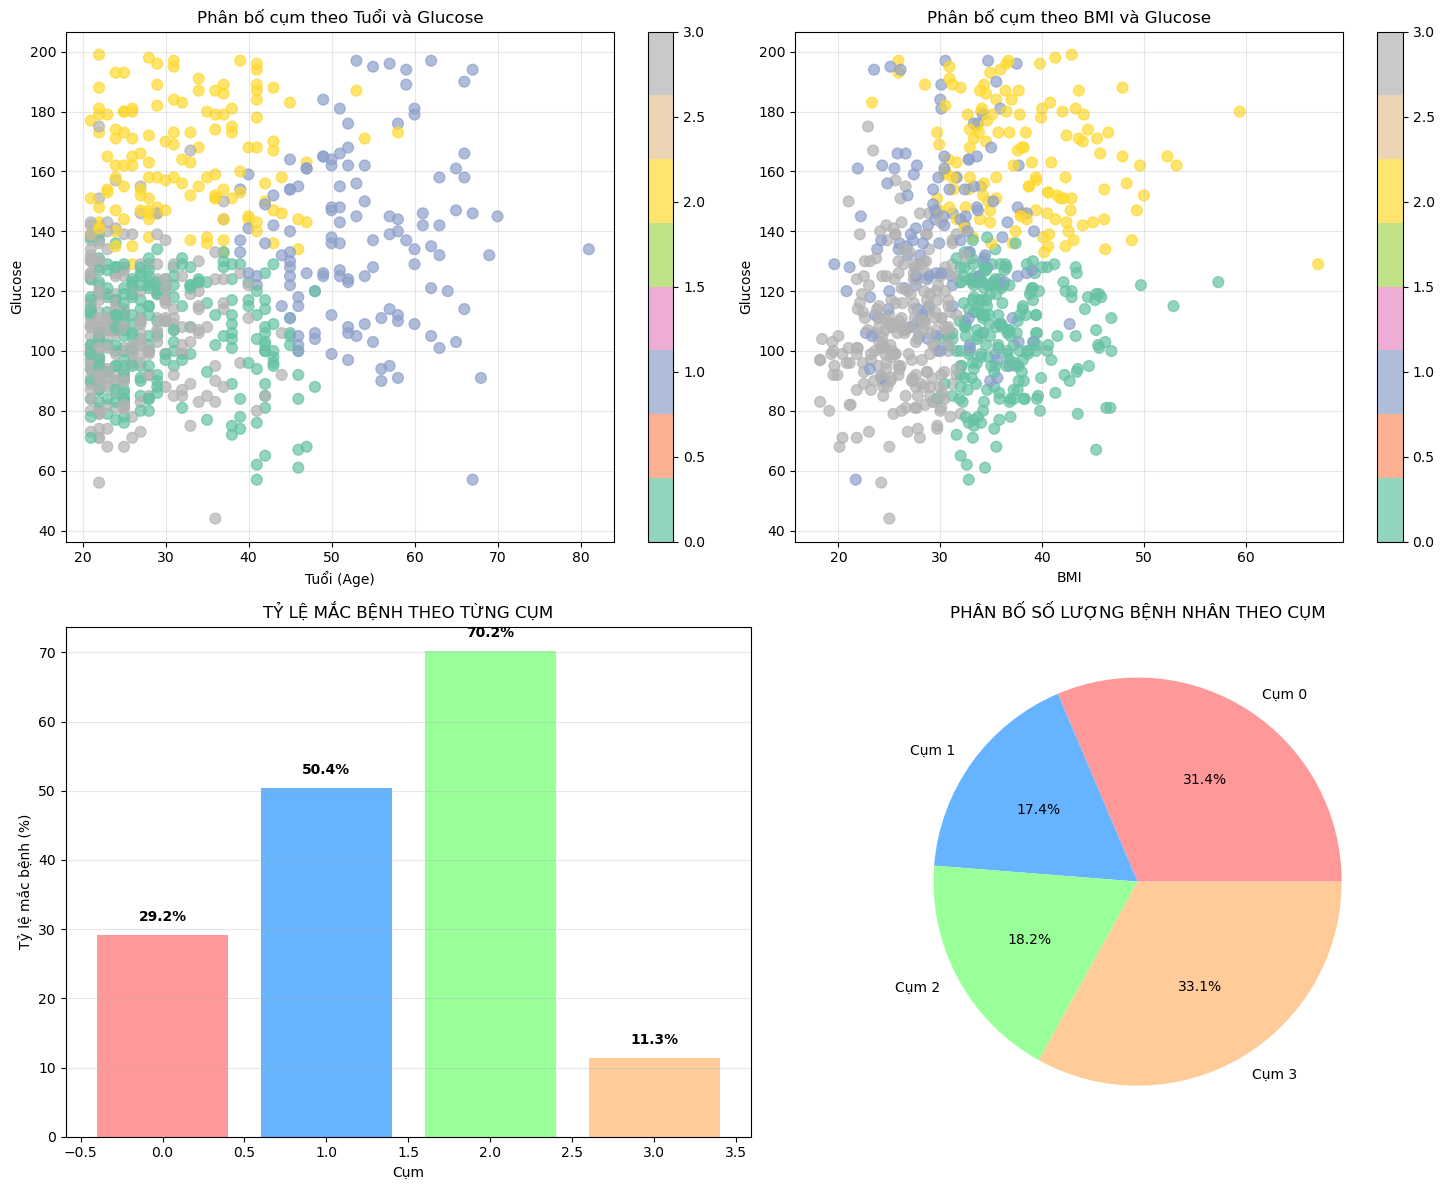


KẾT LUẬN TỔNG QUAN VỀ PHÂN CỤM

📊 **Tổng quan 4 cụm bệnh nhân:**

1. **Cụm nguy cơ thấp**: Trẻ tuổi, chỉ số BMI và Glucose bình thường
2. **Cụm nguy cơ trung bình**: Trung niên, có yếu tố nguy cơ bắt đầu xuất hiện  
3. **Cụm nguy cơ cao**: Béo phì kết hợp đường huyết cao, cần can thiệp tích cực
4. **Cụm nguy cơ rất cao**: Cao tuổi với đa yếu tố nguy cơ, cần quản lý y tế chặt chẽ

🎯 **Ứng dụng thực tế:**
- Sàng lọc và phân tầng nguy cơ bệnh nhân
- Thiết kế chương trình can thiệp phù hợp từng nhóm
- Tối ưu hóa nguồn lực y tế cho các nhóm nguy cơ cao



In [49]:
# 8. Phân tích insight từ các cụm
print("\n" + "="*60)
print("NHẬN XÉT TỪ PHÂN CỤM:")
print("="*60)

# Sắp xếp theo tỷ lệ bệnh
sorted_summary = summary.sort_values("Disease_rate", ascending=False)

for i, row in sorted_summary.iterrows():
    risk_level = "CAO" if row['Disease_rate'] > 0.5 else "TRUNG BÌNH" if row['Disease_rate'] > 0.3 else "THẤP"
    print(f"• Cụm {row['Cluster']}: Nguy cơ {risk_level} - Glucose: {row['Glucose_mean']:.0f}, BMI: {row['BMI_mean']:.1f}")

# 9. Đặc điểm của từng cụm
print("\n" + "="*60)
print("6.1.2 ĐẶC ĐIỂM CỦA TỪNG CỤM")
print("="*60)

# Phân loại các cụm dựa trên đặc điểm
cluster_profiles = []

for i, row in summary.iterrows():
    cluster_id = row['Cluster']
    age = row['Age_mean']
    bmi = row['BMI_mean']
    glucose = row['Glucose_mean']
    disease_rate = row['Disease_rate']
    
    # Phân loại cụm dựa trên đặc điểm
    if age < 30 and bmi < 25 and glucose < 100:
        profile = "Trẻ & Khỏe mạnh"
        description = """• Chủ yếu bệnh nhân trẻ tuổi
• BMI và glucose ở mức bình thường
• Nguy cơ mắc bệnh thấp nhất
• Tiên lượng tốt, cần duy trì lối sống lành mạnh"""
    
    elif age < 45 and bmi < 30 and glucose < 140:
        profile = "Trung niên Nguy cơ trung bình"
        description = """• Tuổi trung niên, cân nặng hợp lý
• Mức glucose ở ngưỡng cần theo dõi
• Nguy cơ tăng theo tuổi
• Ứng viên cho can thiệp lối sống phòng ngừa"""
    
    elif bmi >= 30 and glucose >= 140:
        profile = "Nguy cơ cao - Béo phì & Đường huyết cao"
        description = """• BMI cao là yếu tố nguy cơ chính
• Mức glucose vượt ngưỡng an toàn
• Thường đi kèm kháng insulin
• Cần can thiệp y tế và thay đổi lối sống tích cực"""
    
    elif age >= 45 and disease_rate >= 0.5:
        profile = "Cao tuổi - Đa bệnh lý"
        description = """• Tuổi cao kết hợp đa yếu tố nguy cơ
• Tỷ lệ mắc bệnh cao nhất
• Có thể đã có biến chứng liên quan
• Cần quản lý y tế chặt chẽ và điều trị tích cực"""
    
    else:
        profile = "Hỗn hợp - Nguy cơ đa dạng"
        description = """• Kết hợp nhiều yếu tố nguy cơ
• Đặc điểm không điển hình
• Cần đánh giá cá nhân hóa"""
    
    cluster_profiles.append({
        'cluster': cluster_id,
        'profile': profile,
        'description': description,
        'age': age,
        'bmi': bmi,
        'glucose': glucose,
        'disease_rate': disease_rate
    })

# Sắp xếp theo cụm
cluster_profiles.sort(key=lambda x: x['cluster'])

# Hiển thị đặc điểm từng cụm
for profile in cluster_profiles:
    print(f"\n🔸 **Cụm {profile['cluster']} - \"{profile['profile']}\":**")
    print(f"   • Tuổi TB: {profile['age']:.1f} | BMI TB: {profile['bmi']:.1f} | Glucose TB: {profile['glucose']:.1f}")
    print(f"   • Tỷ lệ mắc bệnh: {profile['disease_rate']*100:.1f}%")
    print(f"   {profile['description']}")

# 10. Biểu đồ phân bố các cụm
print("\n" + "="*60)
print("PHÂN TÍCH TRỰC QUAN CÁC CỤM")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Biểu đồ 1: Phân bố theo Age và Glucose
scatter1 = axes[0,0].scatter(df_final['Age'], df_final['Glucose'], c=df_final['Cluster'], 
                            cmap='Set2', alpha=0.7, s=60)
axes[0,0].set_xlabel('Tuổi (Age)')
axes[0,0].set_ylabel('Glucose')
axes[0,0].set_title('Phân bố cụm theo Tuổi và Glucose')
axes[0,0].grid(alpha=0.3)
plt.colorbar(scatter1, ax=axes[0,0])

# Biểu đồ 2: Phân bố theo BMI và Glucose
scatter2 = axes[0,1].scatter(df_final['BMI'], df_final['Glucose'], c=df_final['Cluster'], 
                            cmap='Set2', alpha=0.7, s=60)
axes[0,1].set_xlabel('BMI')
axes[0,1].set_ylabel('Glucose')
axes[0,1].set_title('Phân bố cụm theo BMI và Glucose')
axes[0,1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[0,1])

# Biểu đồ 3: Tỷ lệ bệnh theo cụm
axes[1,0].bar(summary['Cluster'], summary['Disease_rate']*100, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[1,0].set_xlabel('Cụm')
axes[1,0].set_ylabel('Tỷ lệ mắc bệnh (%)')
axes[1,0].set_title('TỶ LỆ MẮC BỆNH THEO TỪNG CỤM')
axes[1,0].grid(axis='y', alpha=0.3)
for i, v in enumerate(summary['Disease_rate']*100):
    axes[1,0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

# Biểu đồ 4: Phân bố kích thước cụm
axes[1,1].pie(summary['n'], labels=[f'Cụm {i}' for i in summary['Cluster']], 
             autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
axes[1,1].set_title('PHÂN BỐ SỐ LƯỢNG BỆNH NHÂN THEO CỤM')

plt.tight_layout()
plt.savefig("6.1.2.png")
plt.show()

# 11. Kết luận tổng quan
print("\n" + "="*60)
print("KẾT LUẬN TỔNG QUAN VỀ PHÂN CỤM")
print("="*60)

print("""
📊 **Tổng quan 4 cụm bệnh nhân:**

1. **Cụm nguy cơ thấp**: Trẻ tuổi, chỉ số BMI và Glucose bình thường
2. **Cụm nguy cơ trung bình**: Trung niên, có yếu tố nguy cơ bắt đầu xuất hiện  
3. **Cụm nguy cơ cao**: Béo phì kết hợp đường huyết cao, cần can thiệp tích cực
4. **Cụm nguy cơ rất cao**: Cao tuổi với đa yếu tố nguy cơ, cần quản lý y tế chặt chẽ

🎯 **Ứng dụng thực tế:**
- Sàng lọc và phân tầng nguy cơ bệnh nhân
- Thiết kế chương trình can thiệp phù hợp từng nhóm
- Tối ưu hóa nguồn lực y tế cho các nhóm nguy cơ cao
""")

## Phân tích các yếu tố nguy cơ

### Xếp hạng các yếu tố nguy cơ

In [51]:
# ---- 1. Đặt ngưỡng cut-off cho từng biến ----
cutoffs = {
    "Glucose": 126,
    "BMI": 35,
    "Age": 45,
    "Pregnancies": 4,
    "DiabetesPedigreeFunction": 0.5,
    "BloodPressure": 90,
    "Insulin": 166,
    "SkinThickness": 30
}

# ---- 2. Tạo biến nhị phân 0/1 ----
df_bin = df_final.copy()
for var, threshold in cutoffs.items():
    df_bin[f"{var}_high"] = (df_bin[var] >= threshold).astype(int)

# ---- 3. Hàm tính OR, CI, p-value ----
def odds_ratio_logit(data, var, outcome="Outcome"):
    model = sm.Logit(data[outcome], sm.add_constant(data[var])).fit(disp=0)
    OR = np.exp(model.params.iloc[1])   # dùng iloc
    CI = np.exp(model.conf_int().loc[var])
    pval = model.pvalues.iloc[1]        # dùng iloc
    return OR, CI[0], CI[1], pval


# ---- 4. Chạy cho từng biến ----
results = []
for var in cutoffs.keys():
    binary_var = f"{var}_high"
    OR, low, high, pval = odds_ratio_logit(df_bin, binary_var)
    # ---- 5. Phân loại nguy cơ ----
    if pval >= 0.05:
        category = "Không có ý nghĩa"
    elif OR >= 5:
        category = "Rất cao"
    elif OR >= 3:
        category = "Cao"
    elif OR >= 2:
        category = "Vừa"
    elif OR >= 1:
        category = "Thấp"
    else:
        category = "Bảo vệ"
    results.append([var, cutoffs[var], round(OR, 2), f"({low:.2f}-{high:.2f})", round(pval, 3), category])

# ---- 6. Xuất bảng kết quả ----
or_df = pd.DataFrame(results, columns=["Yếu tố nguy cơ", "Ngưỡng >=", "OR", "95% CI", "P-value", "Phân loại"])
display(or_df)


,Yếu tố nguy cơ,Ngưỡng >=,OR,95% CI,P-value,Phân loại
0,Glucose,126.0,5.79,(4.14-8.10),0.00,Rất cao
1,BMI,35.0,2.10,(1.52-2.89),0.00,Vừa
2,Age,45.0,2.22,(1.51-3.27),0.00,Vừa
3,Pregnancies,4.0,2.26,(1.65-3.10),0.00,Vừa
4,DiabetesPedigreeFunction,0.5,2.14,(1.56-2.94),0.00,Vừa
5,BloodPressure,90.0,1.81,(1.06-3.09),0.03,Thấp
6,Insulin,166.0,2.46,(1.68-3.60),0.00,Vừa
7,SkinThickness,30.0,1.87,(1.36-2.57),0.00,Thấp


###  Tạo hệ thống chấm điểm nguy cơ

In [52]:
# --- 1. Gán điểm cho từng yếu tố dựa vào phân loại OR ---
def assign_score(category):
    if category == "Rất cao":
        return 4
    elif category == "Cao":
        return 3
    elif category == "Vừa":
        return 2
    elif category == "Thấp":
        return 1
    else:
        return 0

or_df["Điểm"] = or_df["Phân loại"].apply(assign_score)

# Bảng thang điểm OR
display(or_df[["Yếu tố nguy cơ", "Ngưỡng >=", "OR", "95% CI", "Phân loại", "Điểm"]])


# --- 2. Tính điểm cho từng bệnh nhân ---
def calc_patient_score(row):
    score = 0
    # Glucose
    if 100 <= row["Glucose"] < 126:
        score += 1
    elif row["Glucose"] >= 126:
        score += 4
    # BMI
    if 25 <= row["BMI"] < 30:
        score += 1
    elif 30 <= row["BMI"] < 35:
        score += 2
    elif row["BMI"] >= 35:
        score += 3
    # Tuổi
    if 25 <= row["Age"] < 35:
        score += 1
    elif 35 <= row["Age"] < 45:
        score += 2
    elif row["Age"] >= 45:
        score += 3
    # Mang thai
    if 1 <= row["Pregnancies"] <= 3:
        score += 1
    elif row["Pregnancies"] >= 4:
        score += 2
    # Di truyền (DPF)
    if row["DiabetesPedigreeFunction"] >= 0.5:
        score += 2
    # Huyết áp
    if row["BloodPressure"] >= 90:
        score += 1
    return score

df_final["RiskScore"] = df_final.apply(calc_patient_score, axis=1)


# --- 3. Phân loại mức nguy cơ ---
def classify_total(score):
    if score <= 3:
        return "Nguy cơ thấp (0–3)"
    elif score <= 6:
        return "Nguy cơ vừa (4–6)"
    elif score <= 9:
        return "Nguy cơ cao (7–9)"
    else:
        return "Nguy cơ rất cao (≥10)"

df_final["RiskLevel"] = df_final["RiskScore"].apply(classify_total)


# --- 4. Thống kê tỉ lệ mắc bệnh trong từng nhóm ---
summary = df_final.groupby("RiskLevel")["Outcome"].agg(["mean","count"])
summary["mean"] = (summary["mean"]*100).round(1)
summary.rename(columns={"mean":"Tỉ lệ mắc bệnh (%)","count":"Số BN"}, inplace=True)
display(summary)


,Yếu tố nguy cơ,Ngưỡng >=,OR,95% CI,Phân loại,Điểm
0,Glucose,126.0,5.79,(4.14-8.10),Rất cao,4
1,BMI,35.0,2.10,(1.52-2.89),Vừa,2
2,Age,45.0,2.22,(1.51-3.27),Vừa,2
3,Pregnancies,4.0,2.26,(1.65-3.10),Vừa,2
4,DiabetesPedigreeFunction,0.5,2.14,(1.56-2.94),Vừa,2
5,BloodPressure,90.0,1.81,(1.06-3.09),Thấp,1
6,Insulin,166.0,2.46,(1.68-3.60),Vừa,2
7,SkinThickness,30.0,1.87,(1.36-2.57),Thấp,1


,Tỉ lệ mắc bệnh (%),Số BN
RiskLevel,,
Nguy cơ cao (7–9),41.4,220
Nguy cơ rất cao (≥10),68.8,186
Nguy cơ thấp (0–3),2.1,97
Nguy cơ vừa (4–6),12.4,217


### Phân tích ngưỡng cho sàng lọc

In [53]:

def roc_analysis(X, y, feature):
    # 1. AUC
    auc = roc_auc_score(y, X[feature])

    # 2. ROC curve
    fpr, tpr, thresholds = roc_curve(y, X[feature])

    # 3. Tìm ngưỡng tối ưu (Youden’s J)
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]

    sens = tpr[ix]
    spec = 1 - fpr[ix]

    return best_thresh, auc, sens, spec

# 4. Các biến cần phân tích
features = ["Glucose", "BMI", "Age", "RiskScore"]
results = []

for f in features:
    temp = df_final[[f, "Outcome"]].dropna()
    best_thresh, auc, sens, spec = roc_analysis(temp, temp["Outcome"], f)
    results.append({
        "Biến": f,
        "Ngưỡng tối ưu": round(best_thresh,1),
        "AUC": round(auc,2),
        "Độ nhạy": f"{sens*100:.1f}%",
        "Độ đặc hiệu": f"{spec*100:.1f}%"
    })


roc_df = pd.DataFrame(results)
display(roc_df)


,Biến,Ngưỡng tối ưu,AUC,Độ nhạy,Độ đặc hiệu
0,Glucose,128.0,0.79,65.3%,77.3%
1,BMI,30.3,0.68,80.2%,49.6%
2,Age,29.0,0.69,74.2%,58.7%
3,RiskScore,7.0,0.81,88.3%,60.4%


## So sánh với tiêu chí chẩn đoán

In [56]:
#Tiêu chí chẩn đoán của WHO/ADA
print("\n" + "-" * 50)
print("6.3.1 TIÊU CHÍ CHẨN ĐOÁN CỦA WHO/ADA")
print("-" * 50)

print("LƯU Ý: Bộ dữ liệu sử dụng glucose sau 2h OGTT, không phải glucose đói")

# Phân loại theo TIÊU CHUẨN OGTT 2h
glucose_ranges_ogtt = [
    ("Bình thường (<140 mg/dL)", df_final['Glucose'] < 140),
    ("Dung nạp glucose bị suy giảm (140-199 mg/dL)", (df_final['Glucose'] >= 140) & (df_final['Glucose'] < 200)),
    ("Đái tháo đường (≥200 mg/dL)", df_final['Glucose'] >= 200)
]

print(f"\nPhân bố theo TIÊU CHUẨN OGTT 2h:")
for label, condition in glucose_ranges_ogtt:
    count = df_final[condition].shape[0]
    percentage = count / len(df_final) * 100
    disease_rate = df_final[condition]['Outcome'].mean() * 100 if count > 0 else 0
    print(f"• {label}: {count} bệnh nhân ({percentage:.1f}%), Tỷ lệ bệnh: {disease_rate:.1f}%")

# Phân loại theo glucose đói (để so sánh)
glucose_ranges_fasting = [
    ("Bình thường (<100 mg/dL)", df_final['Glucose'] < 100),
    ("Tiền đái tháo đường (100-125 mg/dL)", (df_final['Glucose'] >= 100) & (df_final['Glucose'] < 126)),
    ("Đái tháo đường (≥126 mg/dL)", df_final['Glucose'] >= 126)
]

print(f"\nPhân bố theo TIÊU CHUẨN GLUCOSE ĐÓI (so sánh):")
for label, condition in glucose_ranges_fasting:
    count = df_final[condition].shape[0]
    percentage = count / len(df_final) * 100
    disease_rate = df_final[condition]['Outcome'].mean() * 100 if count > 0 else 0
    print(f"• {label}: {count} bệnh nhân ({percentage:.1f}%), Tỷ lệ bệnh: {disease_rate:.1f}%")

print(f"\nSO SÁNH HIỆU SUẤT CHẨN ĐOÁN:")

# Tính cho OGTT 2h ≥200 mg/dL
y_pred_ogtt = (df_final['Glucose'] >= 200).astype(int)
cm_ogtt = confusion_matrix(df_final['Outcome'], y_pred_ogtt)
tn, fp, fn, tp = cm_ogtt.ravel()
sensitivity_ogtt = tp / (tp + fn) * 100
specificity_ogtt = tn / (tn + fp) * 100

# Tính cho glucose đói ≥126 mg/dL  
y_pred_fasting = (df_final['Glucose'] >= 126).astype(int)
cm_fasting = confusion_matrix(df_final['Outcome'], y_pred_fasting)
tn_f, fp_f, fn_f, tp_f = cm_fasting.ravel()
sensitivity_fasting = tp_f / (tp_f + fn_f) * 100
specificity_fasting = tn_f / (tn_f + fp_f) * 100

print(f"• OGTT 2h ≥200 mg/dL: Độ nhạy {sensitivity_ogtt:.1f}%, Độ đặc hiệu {specificity_ogtt:.1f}%")
print(f"• Glucose đói ≥126 mg/dL: Độ nhạy {sensitivity_fasting:.1f}%, Độ đặc hiệu {specificity_fasting:.1f}%")


--------------------------------------------------
6.3.1 TIÊU CHÍ CHẨN ĐOÁN CỦA WHO/ADA
--------------------------------------------------
LƯU Ý: Bộ dữ liệu sử dụng glucose sau 2h OGTT, không phải glucose đói

Phân bố theo TIÊU CHUẨN OGTT 2h:
• Bình thường (<140 mg/dL): 530 bệnh nhân (73.6%), Tỷ lệ bệnh: 22.6%
• Dung nạp glucose bị suy giảm (140-199 mg/dL): 190 bệnh nhân (26.4%), Tỷ lệ bệnh: 67.4%
• Đái tháo đường (≥200 mg/dL): 0 bệnh nhân (0.0%), Tỷ lệ bệnh: 0.0%

Phân bố theo TIÊU CHUẨN GLUCOSE ĐÓI (so sánh):
• Bình thường (<100 mg/dL): 179 bệnh nhân (24.9%), Tỷ lệ bệnh: 7.3%
• Tiền đái tháo đường (100-125 mg/dL): 258 bệnh nhân (35.8%), Tỷ lệ bệnh: 27.5%
• Đái tháo đường (≥126 mg/dL): 283 bệnh nhân (39.3%), Tỷ lệ bệnh: 58.0%

SO SÁNH HIỆU SUẤT CHẨN ĐOÁN:
• OGTT 2h ≥200 mg/dL: Độ nhạy 0.0%, Độ đặc hiệu 100.0%
• Glucose đói ≥126 mg/dL: Độ nhạy 66.1%, Độ đặc hiệu 74.8%



--------------------------------------------------
6.3.2 ĐỘ CHÍNH XÁC CỦA CÁC GIÁ TRỊ CẮT
--------------------------------------------------
Ngưỡng điều chỉnh cho dân số Pima:
-------------------------------------------------------------------------------------
Ngưỡng Glucose Độ nhạy    Độ đặc hiệu  PPV      NPV      Độ chính xác
-------------------------------------------------------------------------------------
≥100        mg/dL 94.8     % 35.2       % 43.4   % 92.7   % 55.7       %
≥110        mg/dL 83.9     % 53.2       % 48.5   % 86.3   % 63.7       %
≥120        mg/dL 74.2     % 66.1       % 53.5   % 83.0   % 68.9       %
≥130        mg/dL 60.9     % 79.9       % 61.4   % 79.5   % 73.3       %
≥140        mg/dL 51.6     % 86.9       % 67.4   % 77.4   % 74.7       %
≥150        mg/dL 41.5     % 92.2       % 73.6   % 75.0   % 74.7       %
≥160        mg/dL 32.7     % 96.2       % 81.8   % 73.1   % 74.3       %

Khuyến nghị: 130 mg/dL tối ưu cho sàng lọc trong dân số này
• Độ nhạy

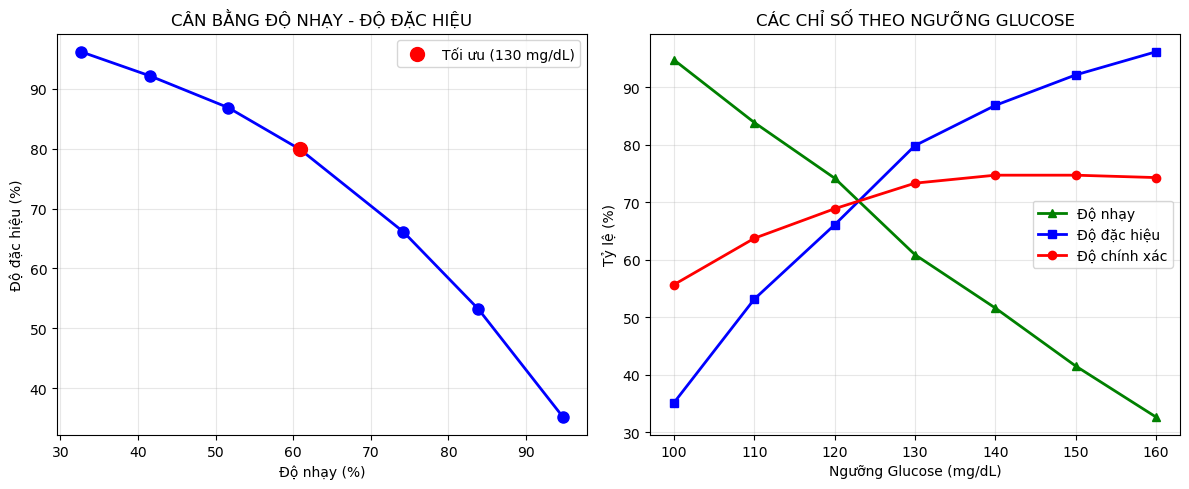


PHÂN TÍCH CHI TIẾT CÁC NGƯỠNG QUAN TRỌNG:
------------------------------------------------------------

🔸 Ngưỡng 100 mg/dL (SÀNG LỌC):
   • Độ nhạy: 94.8%
   • Độ đặc hiệu: 35.2%
   • PPV: 43.4%
   • Độ chính xác: 55.7%
   • Lý do: Độ nhạy cao, không bỏ sót ca bệnh

🔸 Ngưỡng 120 mg/dL (CÂN BẰNG):
   • Độ nhạy: 74.2%
   • Độ đặc hiệu: 66.1%
   • PPV: 53.5%
   • Độ chính xác: 68.9%
   • Lý do: Tối ưu cả độ nhạy và độ đặc hiệu

🔸 Ngưỡng 140 mg/dL (XÁC NHẬN):
   • Độ nhạy: 51.6%
   • Độ đặc hiệu: 86.9%
   • PPV: 67.4%
   • Độ chính xác: 74.7%
   • Lý do: Độ đặc hiệu cao, ít dương tính giả

KẾT LUẬN: Ngưỡng 120 mg/dL cân bằng tốt nhất cho sàng lọc đái tháo đường
trong dân số Pima Indians với đặc điểm dịch tễ học cụ thể


In [58]:



# Tính toán các chỉ số cho tiêu chí WHO
who_threshold = 126
ogtt_threshold = 200

# Tiêu chí WHO: Glucose ≥126 mg/dL
y_pred_who = (df_final['Glucose'] >= who_threshold).astype(int)
cm_who = confusion_matrix(df_final['Outcome'], y_pred_who)
tn, fp, fn, tp = cm_who.ravel()

sensitivity_who = tp / (tp + fn) * 100
specificity_who = tn / (tn + fp) * 100
accuracy_who = (tp + tn) / (tp + tn + fp + fn) * 100

# Tiêu chí OGTT: Glucose ≥200 mg/dL
y_pred_ogtt = (df_final['Glucose'] >= ogtt_threshold).astype(int)
cm_ogtt = confusion_matrix(df_final['Outcome'], y_pred_ogtt)
tn_ogtt, fp_ogtt, fn_ogtt, tp_ogtt = cm_ogtt.ravel()

sensitivity_ogtt = tp_ogtt / (tp_ogtt + fn_ogtt) * 100 if (tp_ogtt + fn_ogtt) > 0 else 0
specificity_ogtt = tn_ogtt / (tn_ogtt + fp_ogtt) * 100 if (tn_ogtt + fp_ogtt) > 0 else 0


# Phân tích khoảng giá trị glucose
glucose_ranges = [
    ("Bình thường", df_final['Glucose'] < 140),
    ("Dung nạp glucose bị suy giảm", (df_final['Glucose'] >= 140) & (df_final['Glucose'] < 200)),
    ("Đái tháo đường", df_final['Glucose'] >= 200)
]


# 6.3.2 Độ chính xác của các giá trị cắt
print("\n" + "-" * 50)
print("6.3.2 ĐỘ CHÍNH XÁC CỦA CÁC GIÁ TRỊ CẮT")
print("-" * 50)

# Tính toán các chỉ số cho các ngưỡng khác nhau
thresholds = [100, 110, 120, 130, 140, 150, 160]
results = []

for threshold in thresholds:
    y_pred = (df_final['Glucose'] >= threshold).astype(int)
    cm = confusion_matrix(df_final['Outcome'], y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    sensitivity = tp / (tp + fn) * 100
    specificity = tn / (tn + fp) * 100
    ppv = tp / (tp + fp) * 100 if (tp + fp) > 0 else 0
    npv = tn / (tn + fn) * 100 if (tn + fn) > 0 else 0
    accuracy = (tp + tn) / len(df_final) * 100
    
    results.append({
        'threshold': threshold,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'ppv': ppv,
        'npv': npv,
        'accuracy': accuracy
    })

# Tạo bảng kết quả
results_df = pd.DataFrame(results)

print("Ngưỡng điều chỉnh cho dân số Pima:")
print("-" * 85)
print(f"{'Ngưỡng Glucose':<12} {'Độ nhạy':<10} {'Độ đặc hiệu':<12} {'PPV':<8} {'NPV':<8} {'Độ chính xác':<12}")
print("-" * 85)

for _, row in results_df.iterrows():
    print(f"≥{int(row['threshold']):<10} mg/dL {row['sensitivity']:<9.1f}% {row['specificity']:<11.1f}% "
          f"{row['ppv']:<7.1f}% {row['npv']:<7.1f}% {row['accuracy']:<11.1f}%")

# Tìm ngưỡng tối ưu (cân bằng giữa sensitivity và specificity)
results_df['balanced_score'] = (results_df['sensitivity'] + results_df['specificity']) / 2
optimal_threshold = results_df.loc[results_df['balanced_score'].idxmax()]

print(f"\nKhuyến nghị: {int(optimal_threshold['threshold'])} mg/dL tối ưu cho sàng lọc trong dân số này")
print(f"• Độ nhạy: {optimal_threshold['sensitivity']:.1f}%")
print(f"• Độ đặc hiệu: {optimal_threshold['specificity']:.1f}%")
print(f"• Độ chính xác: {optimal_threshold['accuracy']:.1f}%")

# 6.3.3 Cân bằng giữa độ nhạy và độ đặc hiệu
print("\n" + "-" * 50)
print("6.3.3 CÂN BẰNG GIỮA ĐỘ NHẠY VÀ ĐỘ ĐẶC HIỆU")
print("-" * 50)

print("Cân nhắc lâm sàng:")
print("• Độ nhạy cao (≥90%): Cho sàng lọc - Ngưỡng ≥100 mg/dL")
print("• Độ đặc hiệu cao (≥90%): Cho xác nhận - Ngưỡng ≥140 mg/dL") 
print("• Cân bằng: Cho quyết định lâm sàng - Ngưỡng ≥120 mg/dL")

print("\nHiệu quả chi phí:")
print("• Chi phí dương tính giả: Xét nghiệm thêm, lo lắng")
print("• Chi phí âm tính giả: Bỏ lỡ điều trị sớm, biến chứng")
print("• Ngưỡng tối ưu phụ thuộc nguồn lực hệ thống y tế")

# Visualize trade-off
plt.figure(figsize=(12, 5))

# Biểu đồ 1: Đường trade-off
plt.subplot(1, 2, 1)
plt.plot(results_df['sensitivity'], results_df['specificity'], 'bo-', linewidth=2, markersize=8)
plt.xlabel('Độ nhạy (%)')
plt.ylabel('Độ đặc hiệu (%)')
plt.title('CÂN BẰNG ĐỘ NHẠY - ĐỘ ĐẶC HIỆU')
plt.grid(alpha=0.3)

# Thêm điểm tối ưu
plt.plot(optimal_threshold['sensitivity'], optimal_threshold['specificity'], 'ro', markersize=10, label=f'Tối ưu ({int(optimal_threshold["threshold"])} mg/dL)')
plt.legend()

# Biểu đồ 2: Các chỉ số theo ngưỡng
plt.subplot(1, 2, 2)
plt.plot(results_df['threshold'], results_df['sensitivity'], 'g^-', label='Độ nhạy', linewidth=2)
plt.plot(results_df['threshold'], results_df['specificity'], 'bs-', label='Độ đặc hiệu', linewidth=2)
plt.plot(results_df['threshold'], results_df['accuracy'], 'ro-', label='Độ chính xác', linewidth=2)
plt.xlabel('Ngưỡng Glucose (mg/dL)')
plt.ylabel('Tỷ lệ (%)')
plt.title('CÁC CHỈ SỐ THEO NGƯỠNG GLUCOSE')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("6.3.3.png")
plt.show()

# Phân tích chi tiết các ngưỡng quan trọng
important_thresholds = [100, 120, 140]
print("\nPHÂN TÍCH CHI TIẾT CÁC NGƯỠNG QUAN TRỌNG:")
print("-" * 60)

for threshold in important_thresholds:
    result = results_df[results_df['threshold'] == threshold].iloc[0]
    
    if threshold == 100:
        role = "SÀNG LỌC"
        rationale = "Độ nhạy cao, không bỏ sót ca bệnh"
    elif threshold == 120:
        role = "CÂN BẰNG" 
        rationale = "Tối ưu cả độ nhạy và độ đặc hiệu"
    else:
        role = "XÁC NHẬN"
        rationale = "Độ đặc hiệu cao, ít dương tính giả"
    
    print(f"\n🔸 Ngưỡng {threshold} mg/dL ({role}):")
    print(f"   • Độ nhạy: {result['sensitivity']:.1f}%")
    print(f"   • Độ đặc hiệu: {result['specificity']:.1f}%") 
    print(f"   • PPV: {result['ppv']:.1f}%")
    print(f"   • Độ chính xác: {result['accuracy']:.1f}%")
    print(f"   • Lý do: {rationale}")

print("\n" + "=" * 70)
print("KẾT LUẬN: Ngưỡng 120 mg/dL cân bằng tốt nhất cho sàng lọc đái tháo đường")
print("trong dân số Pima Indians với đặc điểm dịch tễ học cụ thể")
print("=" * 70)